# Telco Customer Churn
### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets](https://www.kaggle.com/blastchar/telco-customer-churn)

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.

# About the project
In this project, we will work on the Telco Customer Churn dataset and go through the supervised learning pipeline. Here is the content we will cover in this notebook.
### EDA
- Data cleaning
- Missing data handeling
- Outlier reduction
- Normality establishment
- Collinearity check

### Data preprocessing/ feature engineering
- Train-test split
- Quantile transformation
- One-hot-encoding
- Select K best
- PCA

### Model comparing ([spot-chekcing algorithm](https://machinelearningmastery.com/why-you-should-be-spot-checking-algorithms-on-your-machine-learning-problems/))
- Base-line model (dumb model)
- Evaluation metrics
- Machine learning models for classification tasks
    - logistic regression
    - SVM
    - KNN
    - Naive Bayes
    - Decision tree (CART)
    - Random Forest Classifier
    - Gradient Boosting Model
- GridSearchCV for hyper-parameter search and cross-validation

### Sumary
- Sumary of model performance (predictive power)
- Explanatory/interpretable ability
- Suggestion for productions
- Future work

In [1]:
# load data
# https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import plotly


In [239]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kefeimo/Thinkful_DataScience/master/module25%20capstone2/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# check the unique subclasses to see if it makes sense.
for col in df.select_dtypes(include='object').columns:
    print (col, df.select_dtypes(include='object')[col].unique(), df.select_dtypes(include='object')[col].nunique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 7043
gender ['Female' 'Male'] 2
Partner ['Yes' 'No'] 2
Dependents ['No' 'Yes'] 2
PhoneService ['No' 'Yes'] 2
MultipleLines ['No phone service' 'No' 'Yes'] 3
InternetService ['DSL' 'Fiber optic' 'No'] 3
OnlineSecurity ['No' 'Yes' 'No internet service'] 3
OnlineBackup ['Yes' 'No' 'No internet service'] 3
DeviceProtection ['No' 'Yes' 'No internet service'] 3
TechSupport ['No' 'Yes' 'No internet service'] 3
StreamingTV ['No' 'Yes' 'No internet service'] 3
StreamingMovies ['No' 'Yes' 'No internet service'] 3
Contract ['Month-to-month' 'One year' 'Two year'] 3
PaperlessBilling ['Yes' 'No'] 2
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 6531
Churn ['No' 'Yes'] 2


# Exploratory data analysis (EDA)

### First glance of the data 
- There are 20 feautures, and 1 target ('Churn'), 7043 records.
- Note that our target is a categorical variable, so we are working on a classsification problem, to be more specific, binary classification problem.
- It seems there is no missing values from the info(), but we need to look deeper into the data and confirm that. i.e. missing data labeled as 'Unkown' or others.
- We also noticed that 'TotalCharges' should be a float variable but it is object instead, the reason is some missing value was labeled as ' ' (empty string), which should be parse into np.nan. And the whole column should be transformed to float.
- Feature 'SeniorCitizen' has values 0 and 1. In order to make it consistent, we can parse it to 'Yes' and 'No'.
- Feature 'Gender' has values 'Male' and 'Female', to make it consistent, we can change the column name as "is_Male" and parse the value to 'Yes' and 'No'.
- 'customerID' seems pretty random and thus not likely to help explain the model, so we can drop it.
- 'PhoneService' is just repeated information from 'MultipleLines', so, we can drop 'PhoneService' without lossing any information.

In [6]:
df_original = df.copy()

In [7]:
# TotalCharges actually is float-type but with nan value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# clean the data, SeniorCitizen is actually boolen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

# clean 'Gender' feature
df['gender'] = df['gender'].map({'Male':'Yes', 'Female':'No'})
df.rename(columns={"gender": "is_Male"}, errors="raise", inplace=True)

# also drop ID features, unless we can extract certain useful infomation, it looks pretty random
df = df.drop('customerID', axis=1)
df = df.drop('PhoneService', axis=1)

### Missing data analysis

TotalCharges    0.001562
dtype: float64


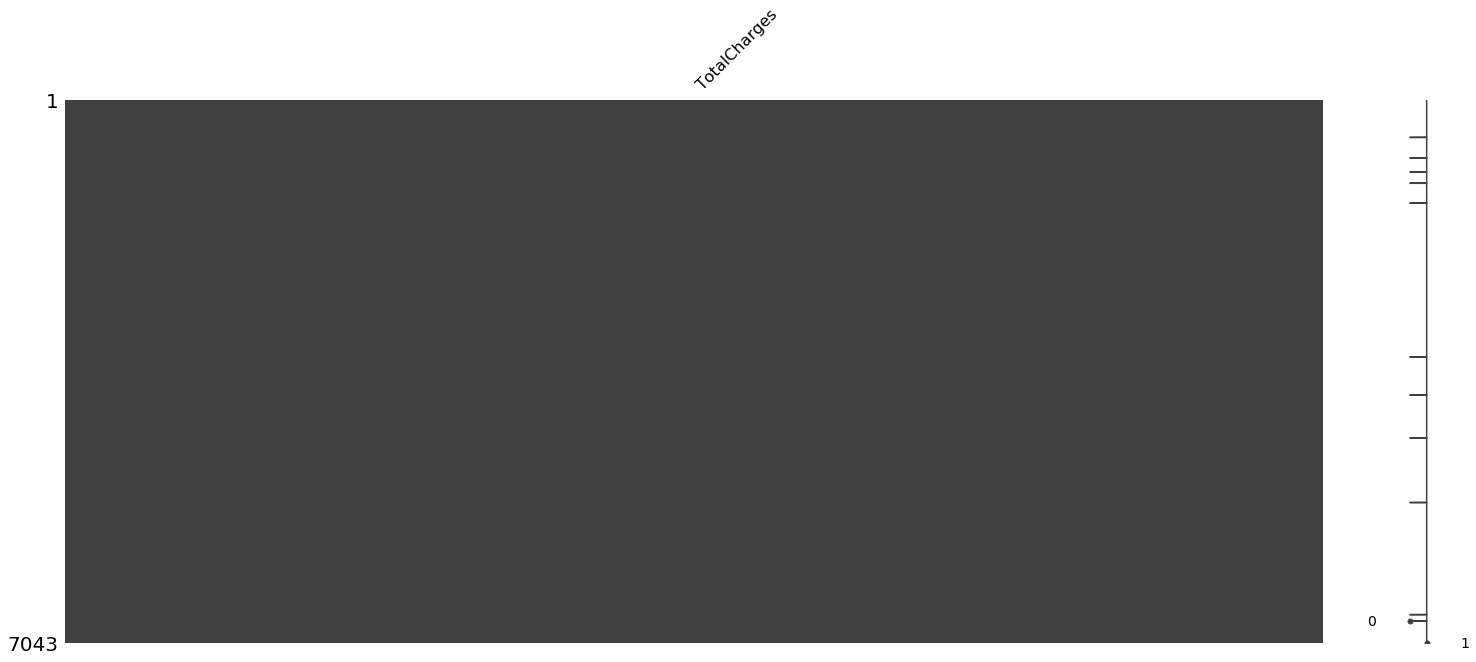

In [8]:
import missingno as msno

missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
print(missing_values)

msno.matrix(df[missing_values.index])

#### Note:
Apparently there is not much missing data, (i.e. only one feature has less than 1% missing data). So we can just drop the records with null values, which would not cause too much problem in our case.

In [9]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_Male           7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


### Data type and unique values exploration. 
In this part we would explore what's the data type of each variables (i.e. object, int, float), how many unique values in each variables, especially for object-type variables.

In [10]:
print("number of object variables: {}".format(len(df.select_dtypes(include='object').columns)))
print("number of int variable: {}".format(len(df.select_dtypes(include='int64').columns)))
print("number of float variable: {}".format(len(df.select_dtypes(include='float').columns)))

# df_object = df.select_dtypes(include='object')
# df_continous = df.select_dtypes(exclude='object')
val_num =[df[col].nunique() for col in df.columns]
df_val_count = pd.concat([pd.DataFrame(df.columns), 
                          pd.DataFrame(val_num), 
                          pd.DataFrame(df.dtypes.values)], axis=1)
df_val_count.columns = ['col_name', 'val_count', 'dtypes']
df_val_count = df_val_count.sort_values(by=['val_count'])
# df_val_count[df_val_count.val_count <100]
df_val_count

number of object variables: 16
number of int variable: 1
number of float variable: 2


,col_name,val_count,dtypes
0,is_Male,2,object
14,PaperlessBilling,2,object
3,Dependents,2,object
18,Churn,2,object
1,SeniorCitizen,2,object
2,Partner,2,object
5,MultipleLines,3,object
6,InternetService,3,object
7,OnlineSecurity,3,object
8,OnlineBackup,3,object


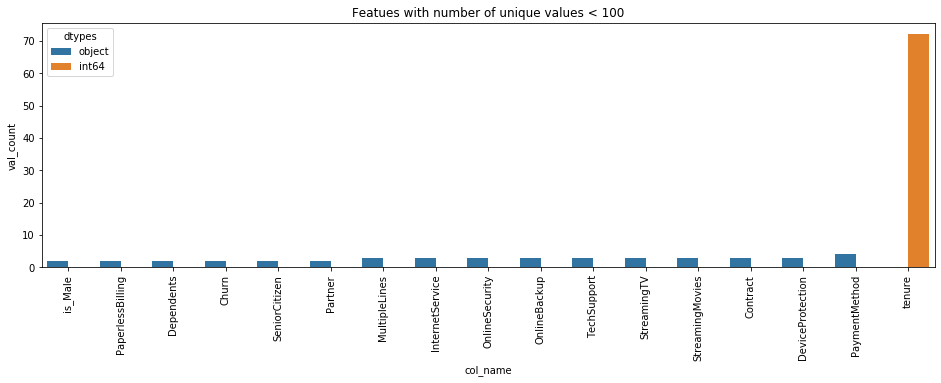

In [11]:
plt.figure(figsize=(16,4.5))
sns.barplot(
    data= df_val_count[df_val_count.val_count<100],
    x= 'col_name',
    y= 'val_count',
    hue = 'dtypes')
plt.xticks(rotation=90)
plt.title('Featues with number of unique values < 100')
plt.show()

#### Notes:
- Not every machine learning models can handel object-type variables, so it is sometimes desired to transform object-type variables into several int/float type features--so called one-hot-encoding. However, when some features include too many unique sub-categories, it will generate many feautures and that will cause trouble. This is another reason why we dropped the 'customerID' feature at the begining.
- Sometimes, we might treat int-type variables as object-type as well, especially when there is not many unique values. But in this project, we will maintain the original int type.


### Outliers inspection (on numerical variables, int and float)

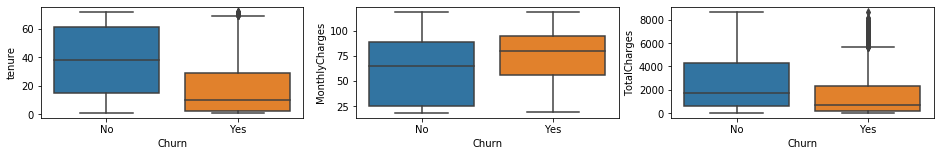

In [12]:
plt.figure(figsize=(16,4.5))
df_tmp = df
col_num_tmp = len(df_tmp.select_dtypes(exclude='object').columns)
for index in range(1, col_num_tmp+1):
    plt.subplot(col_num_tmp//3+1, 3, index)
    col = df_tmp.select_dtypes(exclude='object').columns[index - 1]
    sns.boxplot( y = col, orient='vertical', x= 'Churn', data=df)
#     sns.boxplot( y = col, orient='vertical', data=df)

#### Notes:
- Some columns exist outliers.
- we can use windorization to handel outliers.

### Univariant analysis - distributions

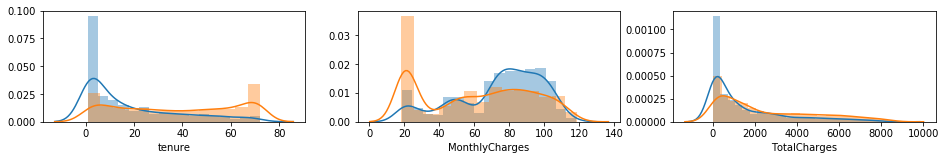

In [13]:
# for continous variables, histogram (or countplot for extreme cases)
plt.figure(figsize=(16,4.5))
df_tmp = df
col_num_tmp = len(df_tmp.select_dtypes(exclude='object').columns)
for index in range(1, col_num_tmp+1):
    plt.subplot(col_num_tmp//3+1, 3, index)
    col = df_tmp.select_dtypes(exclude='object').columns[index - 1]
    try:
        sns.distplot(a = df_tmp[col][df['Churn']=='Yes'])
        sns.distplot(a = df_tmp[col][df['Churn']=='No'])
    except:
#         sns.distplot(a = df[col], kde=False)
        sns.countplot(df[col])
        plt.xticks(rotation=90)
    


### Distribution for object variables

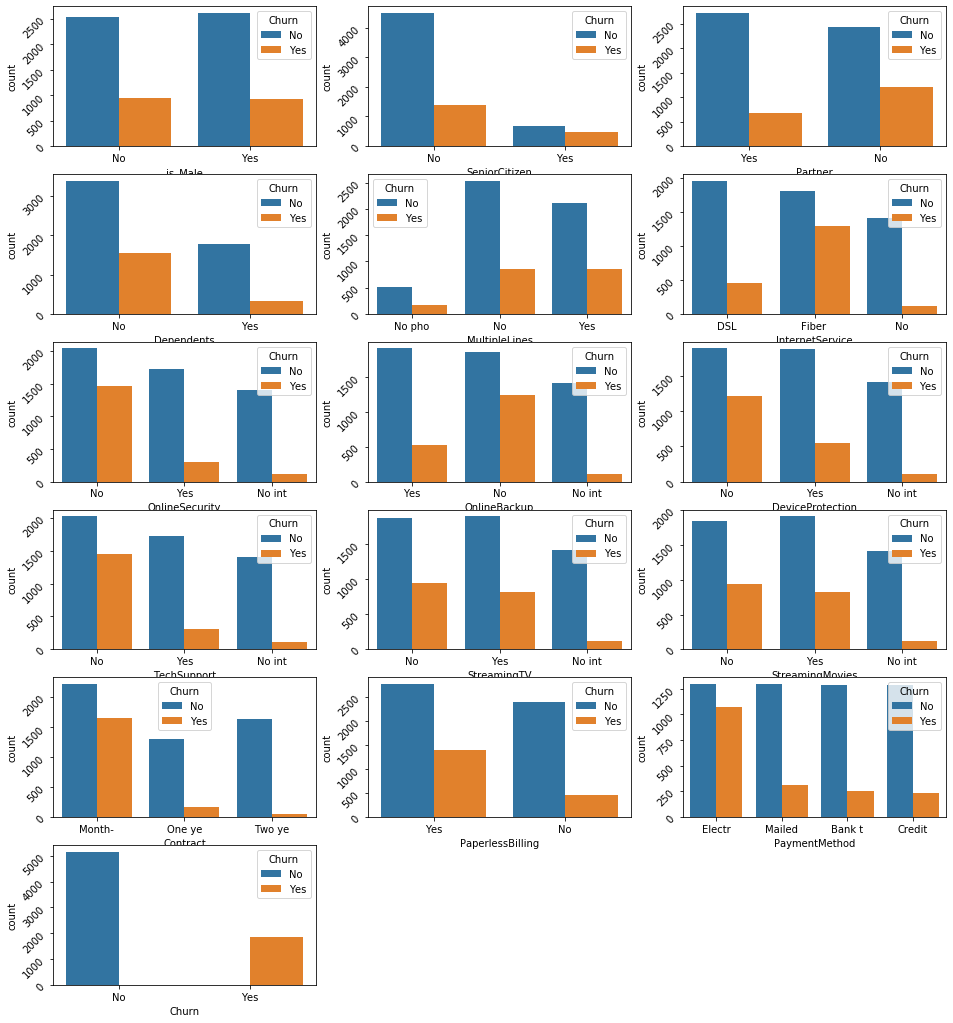

In [14]:
plt.figure(figsize=(16,18))
df_tmp = df
col_num_tmp = len(df_tmp.select_dtypes(include='object').columns)
for index in range(1, col_num_tmp+1):
    plt.subplot(col_num_tmp//3+1, 3, index)
    col = df_tmp.select_dtypes(include='object').columns[index - 1]
    
    ax = sns.countplot(data = df, x=col, y=None, hue="Churn", )
    labels = ax.get_xticklabels()
    labels_trim = [label.get_text()[:6] for label in labels]
#     print(labels)
    ax.set_xticklabels(labels=labels_trim)
#     plt.title(col)
    plt.yticks(rotation=45)
#     if col == 'ServiceArea':
#         ax.set_xticklabels(labels=[])
#         start, end = ax.get_xlim()
#         ax.xaxis.set_ticks(np.arange(start, end, (end-start)//5))

### Check label balance

In [15]:
print("the ratio of churn/not-churn is: {}".format(df.Churn[df.Churn=='Yes'].count()/df.Churn[df.Churn!='Yes'].count()))

the ratio of churn/not-churn is: 0.36199883788495063


#### Notes:
- The target variable is somewhat imbalanced, the ratio of churn/not churn is: 0.36. In order to make it more balanced for model training, we might apply resampling methods, i.e. under-sampling, SMOT.
- Some continous variables are very skewed, which is consistent with our observation that many outliers on one side.
- We might want to trasnform the data to make it more normal, based on the model to use, i.e. linear regression

### Collinearity check
last but not last, let's check coolinearity between continous variables

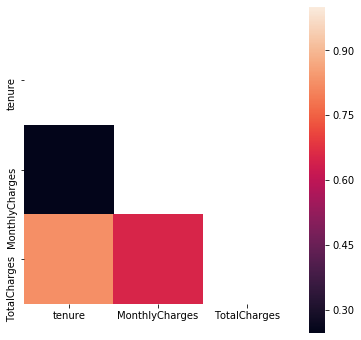

In [16]:
# visualize the correlationship using heatmap
# note: we only care about the absolute value,
# note: either lower triangle or upper triangle would gives the info
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, square=True, mask=mask)

In [17]:
colli_threshold = 0.7
high_colli_list = []
for row in np.arange(len(corr_matrix)):
    for col in np.arange(row):
        if corr_matrix.iloc[row, col] >= colli_threshold:
            high_colli_list.append([corr_matrix.index[row], corr_matrix.columns[col], corr_matrix.iloc[row, col]])
#             print("{} - {}".format(corr_matrix.index[row], corr_matrix.columns[col]))
print("when threshold is: {}, there are {} high collinearity-pairs.".format(colli_threshold, len(high_colli_list)))
print(" ")
print("high collinearity pairs:")
for item in high_colli_list:
    print("{} - {}, score: {:.2f}".format(item[0], item[1], item[2]))

when threshold is: 0.7, there are 1 high collinearity-pairs.
 
high collinearity pairs:
TotalCharges - tenure, score: 0.83


#### Notes:
- Collinear features can cause some problems, i.e. it might cause instablity for many parameter-based estimators
- We might want to get rid of one of the features in the aforementioned feature pairs. Or we can use PCA to address issue.
- Right now, we just analysed collinearity between numerical features. Later on we might do it again when there are more numerical features after one-hot-encoding.

# Data Cleaning and Feature Engineering in pipelines
- The data preprocessing might include missing data handeling (done), outlier reduction, categorical data encoding, data transformation (i.e. Logarithmic transform, standardization, normalization, PCA).
- As mentioned before, each model might have its specific requirement for data quality and/or features, i.e. KNN require data standardization to achieve better performance, while might not be mandatory for other estimators. logistic regression model is sensitive to outliers, but certain ensemble model like random forest is insensitive to outliers. Even for different Python packages, the requirement for data can be different, i.e. Sklearn package ask for one-hot-encoding data to handle categorical features, while package like h2o can deal with categorical data directly.
- The idea here is try to perform minimium data preprocessing to achieve best model performance, without compromising interpretability, i.e. we might lose intereability of original features after PCA. 
- Another important thing is that the feature engineering mehtods should be robust for both training set and test set.
- Accordingly, we will make different versions of featured data. The techniques will use as follows including: one-hot-encoding, quantile transform, select K best, and PCA.

### Data split before feature engineering
- In a real-world situation the data used for evaluation is unseen during training, which means such data is unseen for feature engineering process. So it is only fair to split the data into training set and test set before data cleaning and feature engineering. (Though we did fix the missing data problem)
- This is the reason we choose Sklearn pipeline module. Since we can easily perform the same preprocessing on both training set and test set.
- In this project, we will use a 2:1 split.(i.e. test size = 0.33)

In [18]:
from sklearn.model_selection import train_test_split

X = df.copy()
X = X.drop('Churn', axis=1)
y = df.Churn
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

# reorder the index
X_train = X_train.reset_index().drop('index', axis=1)
X_test = X_test.reset_index().drop('index', axis=1)

y_train = y_train.reset_index().drop('index', axis=1)
y_test = y_test.reset_index().drop('index', axis=1)


In [19]:
print("number of training data: {}".format(len(X_train.index)))
print("number of test data: {}".format(len(X_test.index)))

number of training data: 4711
number of test data: 2321


## Data transformation (for numerical data)
- Several data transformation techniques, i.e. logarithmic transformation, boxcox transformation can reduce outlier numbers and make more normal-distribution-like.
- We will utilize the modules in Sklearn's preprocessing package, potential transformation include RobustScaler, PowerTransformer, QuantileTransformer, Normalizer. [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) We will choose QuantileTransformer with normal distribution output as the transformer, which has the best performance among others.
- Note that such transform only perform on numerical data, to more specific, only on float-type data. Since in this data set, the int-type features are actually ordinal categorical data, and it is more likely to perform better when treated as other categorical data in classification problem.

In [20]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
# quantile_transformer = QuantileTransformer(output_distribution='uniform')
X_train_quantrans = quantile_transformer.fit_transform(X_train.select_dtypes(include=['float', 'int64']))
# X_train_quantrans
X_train_quantrans = pd.DataFrame(X_train_quantrans)
X_train_quantrans.columns = X_train.select_dtypes(include=['float', 'int64']).columns

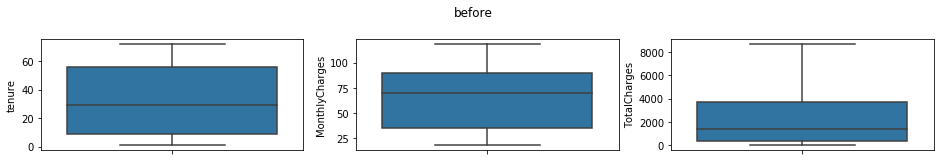

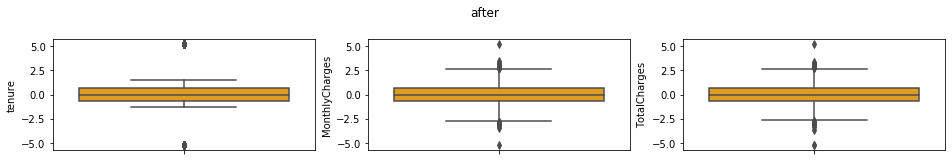

In [21]:
# before
df_tmp = X_train.select_dtypes(exclude='object')
plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    sns.boxplot( y = col, orient='vertical',  data=df_tmp)
#     sns.boxplot( y = col, orient='vertical', data=df)
plt.suptitle('before')
plt.show()


# after
df_tmp = X_train_quantrans
plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    sns.boxplot( y = col, orient='vertical',  data=df_tmp, color='orange')
#     sns.boxplot( y = col, orient='vertical', data=df)
plt.suptitle('after')
plt.show()

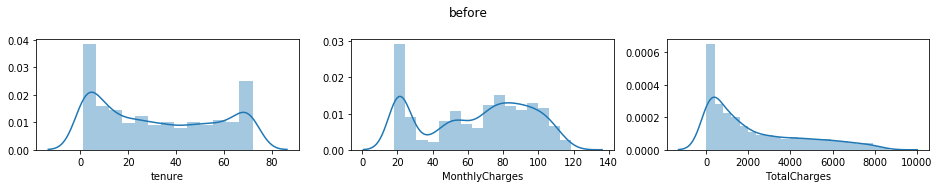

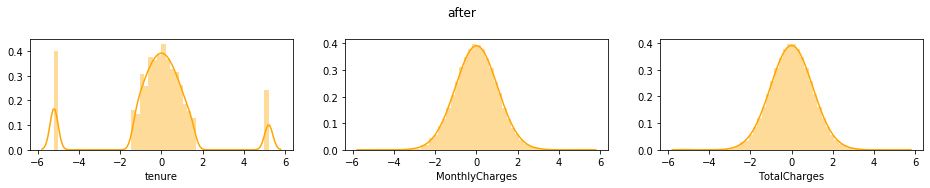

In [22]:
# before
df_tmp = X_train.select_dtypes(exclude='object')
plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    try:
        sns.distplot(a = df_tmp[col])
#         sns.distplot(a = df_tmp[col][df_tmp['Churn']=='Yes'])
#         sns.distplot(a = df_tmp[col][df_tmp['Churn']=='No'])
    except:
#         sns.distplot(a = df[col], kde=False)
        sns.countplot(df_tmp[col])
        plt.xticks(rotation=90)
plt.suptitle('before')
plt.show()

# after
# df_tmp = pd.concat([X_train_quantrans, y_train], axis = 1)
df_tmp = X_train_quantrans
plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    try:
        sns.distplot(a = df_tmp[col], color='orange')
#         sns.distplot(a = df_tmp[col][df_tmp['Churn']=='Yes'])
#         sns.distplot(a = df_tmp[col][df_tmp['Churn']=='No'])
    except:
#         sns.distplot(a = df[col], kde=False)
        sns.countplot(df_tmp[col])
        plt.xticks(rotation=90)
plt.suptitle('after')
plt.show()

#### Notes:
- After the QuantileTransformation, the feature distributions have become more normal. Also, all the data is in the same scale, which is helpful for KNN model.
- Normally,the number of outliers should have decreased after transformation. But in our cases the number of outliers increased. When looking at the distribution before quantile transformation we can spot two peaks at the far end. And those two peaks transformed into the outliers. An option is to seperate the tenure into two groups (i.e. high tenure and low tenure), but we will not discuss this in this project.
- Again, each machine learning model might have its "favourite" feature engineering techniques, many times it is even a case-by-case situation. That's why we will have different feature-engineered data for model training and evaluation. 
#### Side notes:
In this case, we might be satisfied with the transformed data, i.e. the distribution is somewhat normal from visualization. But we can also use descriptive stats to quantify normality and exclude those features with low "normality scores". Some options exclude noramltest, shapiro.

In [23]:
# use normality test to pick features
from scipy.stats import normaltest, shapiro

nor_threshold = 0.8
col_list = []
for col in X_train_quantrans.columns:
    k2, p = shapiro(X_train[col])
#     print(col)
#     print(k2, p)
    if k2 > nor_threshold:
        col_list.append(col)
# col_list

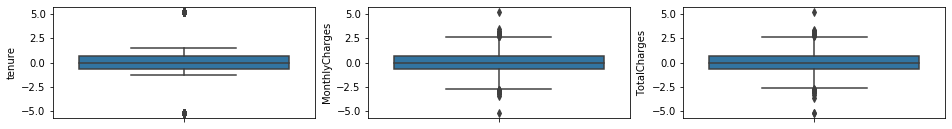

In [24]:
df_tmp = X_train_quantrans[col_list]

plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    sns.boxplot( y = col, orient='vertical',  data=df_tmp)
#     sns.boxplot( y = col, orient='vertical', data=df)

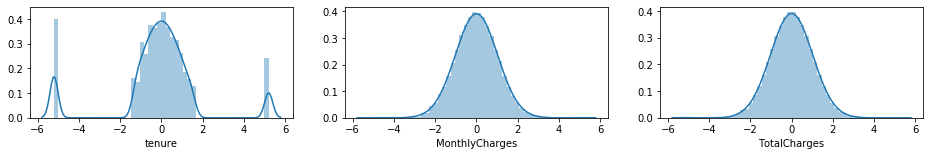

In [25]:
df_tmp = X_train_quantrans[col_list]

plt.figure(figsize=(16,4.5))
for index in range(1, len(df_tmp.columns)+1):
    plt.subplot(len(df_tmp.columns)//3+1, 3, index)
    col = df_tmp.columns[index - 1]
    try:
        sns.distplot(a = df_tmp[col])
    except:
#         sns.distplot(a = df[col], kde=False)
        sns.countplot(df_tmp[col])
        plt.xticks(rotation=90)

In [26]:
# the transformation can apply to the "unseen" test data as well
X_train_select = X_train[col_list]
X_test_select = X_test[col_list]

X_train_select_quantrans = quantile_transformer.fit_transform(X_train_select)
X_test_select_quantrans = quantile_transformer.transform(X_test_select)

X_train_select_quantrans = pd.DataFrame(X_train_select_quantrans)
X_test_select_quantrans = pd.DataFrame(X_test_select_quantrans)

X_train_select_quantrans.columns = col_list
X_test_select_quantrans.columns = col_list
# X_test_select_quantrans

### One-hot-encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')
# enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# X_train_dummy = enc.fit(X_train.drop('ServiceArea', axis=1).select_dtypes(include='object'), )
X_train_dummy = enc.fit_transform(X_train.select_dtypes(include='object'), )
X_test_dummy = enc.transform(X_test.select_dtypes(include='object'))

col_encoding_list = enc.get_feature_names(X_train.select_dtypes(include='object').columns)

df_X_train_dummpy = pd.DataFrame(X_train_dummy)
df_X_train_dummpy.columns = col_encoding_list
df_X_test_dummpy = pd.DataFrame(X_test_dummy)
df_X_test_dummpy.columns = col_encoding_list

In [28]:
print(len(df_X_train_dummpy.columns))
print(len(df_X_test_dummpy.columns))

26
26


#### Notes:
- As mentioned before, many times we need to apply one-hot-encoding so that the model can handel categorical data.
- We choose sklearn.preprocessing's OneHotEncoder module instead of Pandas' get_dummy because it is a more robust approach when preprocssing unseen data. Also notic the handle_unknown='ignore'/'unknown', drop=None/'first' parameter settings.

### Wrap up the data preprocessing

In [29]:
# our data to work on now
X_train_1 = pd.concat([X_train_select_quantrans, df_X_train_dummpy], axis=1)
X_test_1 = pd.concat([X_test_select_quantrans, df_X_test_dummpy], axis=1)


y_train_1 = pd.get_dummies(y_train, drop_first=True)
y_test_1 = pd.get_dummies(y_test, drop_first=True)

In [30]:
# our data to work on now, without quantrans
X_train_2 = pd.concat([X_train_select, df_X_train_dummpy], axis=1)
X_test_2 = pd.concat([X_test_select, df_X_test_dummpy], axis=1)

y_train_2 = y_train_1
y_test_2 = y_test_1


In [31]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4711 non-null   float64
 1   MonthlyCharges                         4711 non-null   float64
 2   TotalCharges                           4711 non-null   float64
 3   is_Male_Yes                            4711 non-null   float64
 4   SeniorCitizen_Yes                      4711 non-null   float64
 5   Partner_Yes                            4711 non-null   float64
 6   Dependents_Yes                         4711 non-null   float64
 7   MultipleLines_No phone service         4711 non-null   float64
 8   MultipleLines_Yes                      4711 non-null   float64
 9   InternetService_Fiber optic            4711 non-null   float64
 10  InternetService_No                     4711 non-null   float64
 11  Onli

#### Notes:
- So far, we have preprocessed two versions of data, version1: with quantile transformation, version2: without quntile transformation. And both of the them have 46 features, all float-type.
- Since we have more numerical features now, it is a good time to check collinearity again.

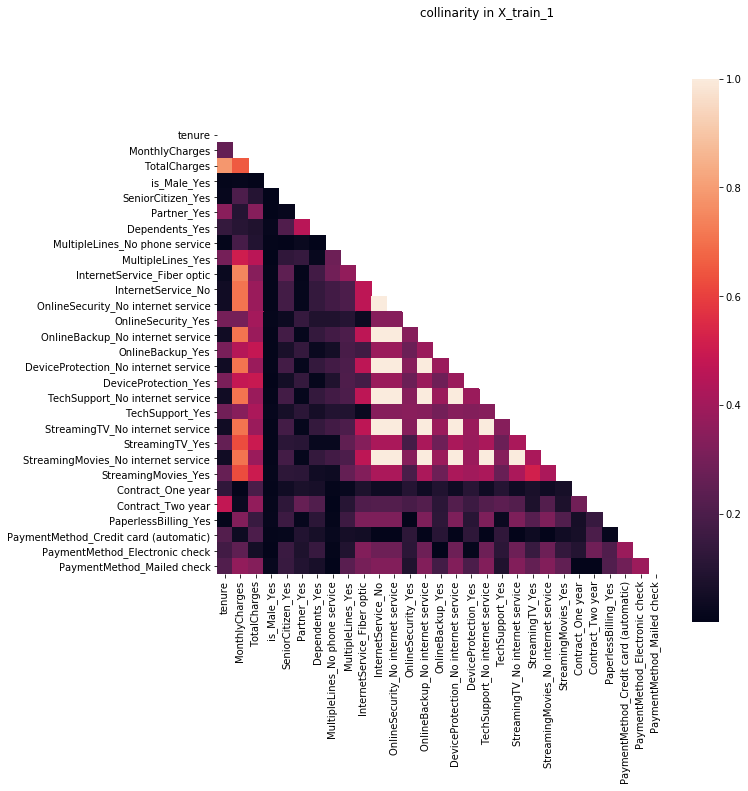

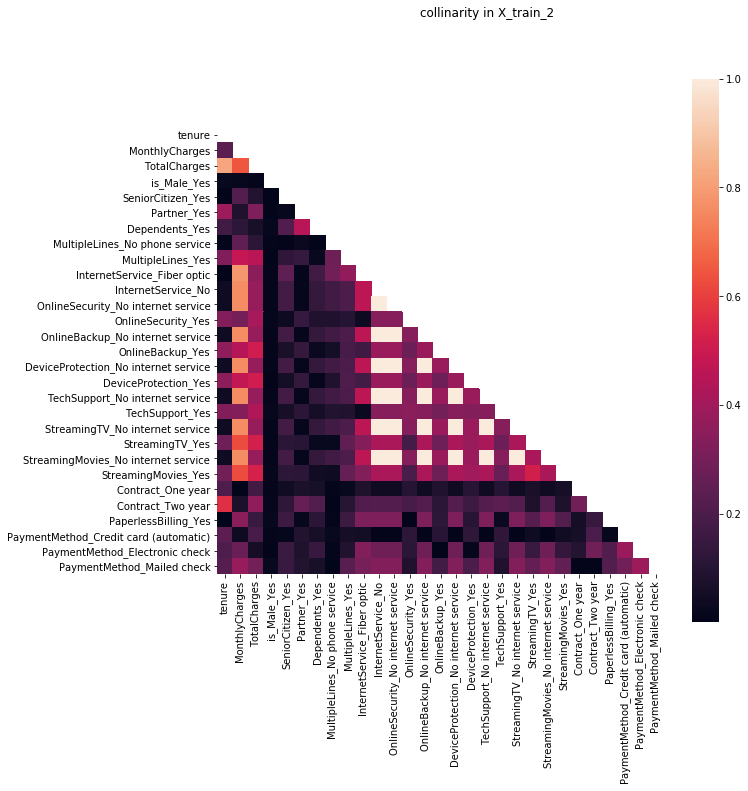

In [32]:
# visualize the correlationship using heatmap
# note: we only care about the absolute value,
# note: either lower triangle or upper triangle would gives the info
# for X_train1
corr_matrix = X_train_1.corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, square=True, mask=mask)
plt.suptitle('collinarity in X_train_1')
plt.show()

# for X_train_2
corr_matrix = X_train_2.corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, square=True, mask=mask)
plt.suptitle('collinarity in X_train_2')
plt.show()

In [33]:
corr_matrix = X_train_1.corr()

colli_threshold = 0.7
high_colli_list = []
colli_hash = []
colli_dict = {}
for row in np.arange(len(corr_matrix)):
    for col in np.arange(row):
        if corr_matrix.iloc[row, col] >= colli_threshold:
            high_colli_list.append([corr_matrix.index[row], corr_matrix.columns[col], corr_matrix.iloc[row, col]])
            if corr_matrix.index[row] not in colli_hash:
                colli_hash.append(corr_matrix.index[row])
            if corr_matrix.columns[col] not in colli_hash:
                colli_hash.append(corr_matrix.columns[col])
                
            if corr_matrix.index[row] not in list(colli_dict.keys()):               
                colli_dict[corr_matrix.index[row]]=1
            else:
                colli_dict[corr_matrix.index[row]]= colli_dict[corr_matrix.index[row]]+1
            if corr_matrix.columns[col] not in list(colli_dict.keys()):               
                colli_dict[corr_matrix.columns[col]]=1
            else:
                colli_dict[corr_matrix.columns[col]]= colli_dict[corr_matrix.columns[col]]+1
#             if corr_matrix.index[row] in list(colli_dict.keys()):
            
                
#             print("{} - {}".format(corr_matrix.index[row], corr_matrix.columns[col]))
print("when threshold is: {}, there are {} high collinearity-pairs.".format(colli_threshold, len(high_colli_list)))
print(" ")
print("high collinearity pairs:")
for item in high_colli_list:
    print("{} - {}, score: {:.2f}".format(item[0], item[1], item[2]))

when threshold is: 0.7, there are 23 high collinearity-pairs.
 
high collinearity pairs:
TotalCharges - tenure, score: 0.79
InternetService_Fiber optic - MonthlyCharges, score: 0.75
OnlineSecurity_No internet service - InternetService_No, score: 1.00
OnlineBackup_No internet service - InternetService_No, score: 1.00
OnlineBackup_No internet service - OnlineSecurity_No internet service, score: 1.00
DeviceProtection_No internet service - InternetService_No, score: 1.00
DeviceProtection_No internet service - OnlineSecurity_No internet service, score: 1.00
DeviceProtection_No internet service - OnlineBackup_No internet service, score: 1.00
TechSupport_No internet service - InternetService_No, score: 1.00
TechSupport_No internet service - OnlineSecurity_No internet service, score: 1.00
TechSupport_No internet service - OnlineBackup_No internet service, score: 1.00
TechSupport_No internet service - DeviceProtection_No internet service, score: 1.00
StreamingTV_No internet service - InternetSe

In [34]:
colli_dict

{'TotalCharges': 1,
 'tenure': 1,
 'InternetService_Fiber optic': 1,
 'MonthlyCharges': 1,
 'OnlineSecurity_No internet service': 6,
 'InternetService_No': 6,
 'OnlineBackup_No internet service': 6,
 'DeviceProtection_No internet service': 6,
 'TechSupport_No internet service': 6,
 'StreamingTV_No internet service': 6,
 'StreamingMovies_No internet service': 6}

#### Notes:
- The coorelation coefficient matrix for X_train_1 and X_train_2 are very similar. Apparently, there many high collinear pairs now, when setting correlation coefficient threshold as 0.7. And we need to get rid some of them.
- We can use a iterative method to filter out one of the features in the pairs each time until there is no more high collinear pairs.
- Or we can use PCA.

### Select K best

In [216]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k="all")
_ = bestfeatures.fit(X_train_1,y_train_1)

dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(X_train_1.columns)
dftypes = pd.DataFrame(X_train_1.dtypes.values)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, dftypes],axis=1)
featureScores.columns = ['Specs','Score','dftypes']  #naming the dataframe columns

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [36]:
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score,dftypes
0,tenure,614.843109,float64
9,InternetService_Fiber optic,524.830791,float64
24,Contract_Two year,477.965701,float64
27,PaymentMethod_Electronic check,438.164194,float64
21,StreamingMovies_No internet service,259.902437,float64
19,StreamingTV_No internet service,259.902437,float64
17,TechSupport_No internet service,259.902437,float64
15,DeviceProtection_No internet service,259.902437,float64
13,OnlineBackup_No internet service,259.902437,float64
11,OnlineSecurity_No internet service,259.902437,float64


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


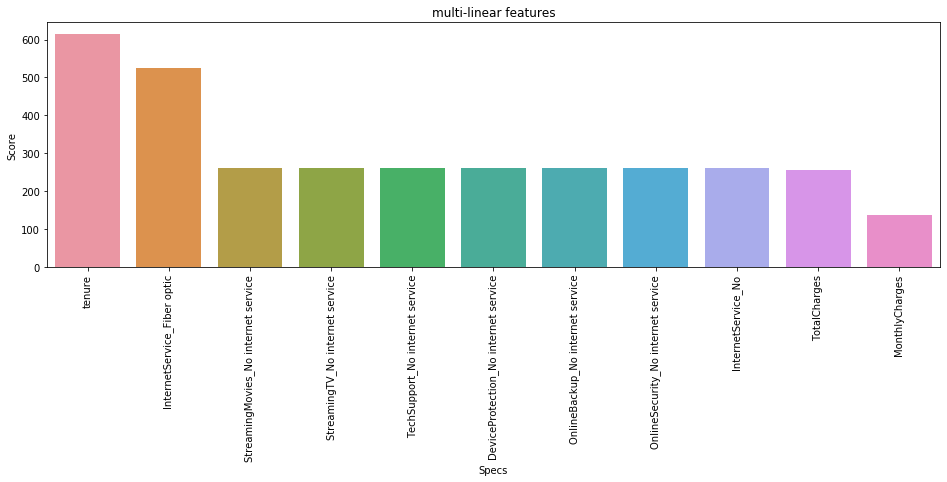

In [37]:
plt.figure(figsize=(16,4.5))
sns.barplot(
    data= featureScores.sort_values(by='Score', ascending=False)[featureScores.Specs.isin(list(colli_hash))],
    x= 'Specs',
    y= 'Score',
#     hue = 'dtypes'
)

plt.xticks(rotation=90)
plt.title('multi-linear features')
plt.show()

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


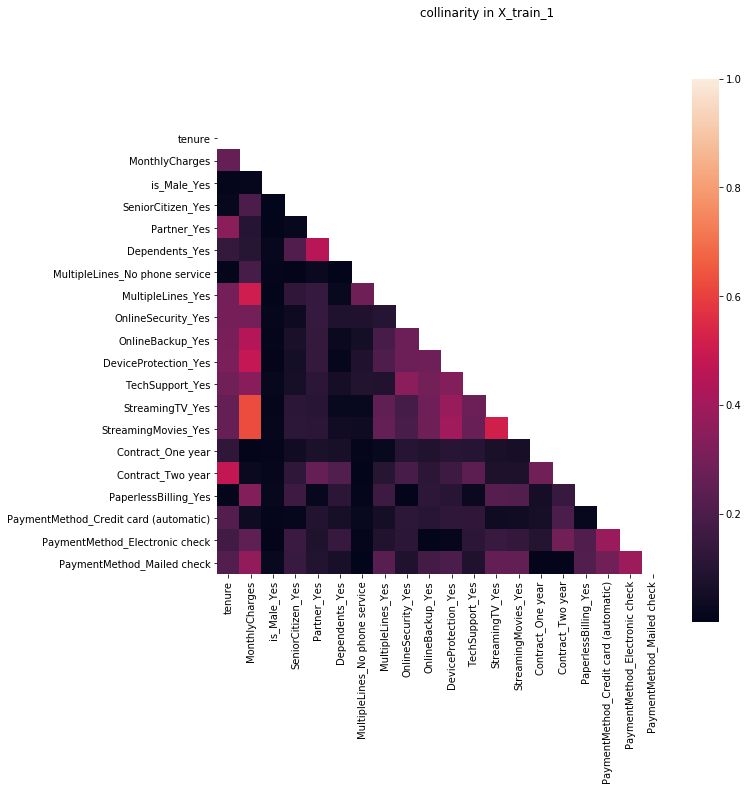

when threshold is: 0.7, there are 0 high collinearity-pairs.
 
high collinearity pairs:


In [38]:
col_exclude_list = featureScores.sort_values(by='Score', ascending=False)[featureScores.Specs.isin(list(colli_hash))].Specs.values
col_select = [col for col in list(X_train_1.columns) if col not in col_exclude_list[-10:-1]]

# col_select

# for X_train1
corr_matrix = X_train_1[col_select].corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, square=True, mask=mask)
plt.suptitle('collinarity in X_train_1')
plt.show()


colli_threshold = 0.7
high_colli_list = []
# colli_hash = []
# colli_dict = {}
for row in np.arange(len(corr_matrix)):
    for col in np.arange(row):
        if corr_matrix.iloc[row, col] >= colli_threshold:
            high_colli_list.append([corr_matrix.index[row], corr_matrix.columns[col], corr_matrix.iloc[row, col]])
#             if corr_matrix.index[row] not in colli_hash:
#                 colli_hash.append(corr_matrix.index[row])
#             if corr_matrix.columns[col] not in colli_hash:
#                 colli_hash.append(corr_matrix.columns[col])
                
#             if corr_matrix.index[row] not in list(colli_dict.keys()):               
#                 colli_dict[corr_matrix.index[row]]=1
#             else:
#                 colli_dict[corr_matrix.index[row]]= colli_dict[corr_matrix.index[row]]+1
#             if corr_matrix.columns[col] not in list(colli_dict.keys()):               
#                 colli_dict[corr_matrix.columns[col]]=1
#             else:
#                 colli_dict[corr_matrix.columns[col]]= colli_dict[corr_matrix.columns[col]]+1
#             if corr_matrix.index[row] in list(colli_dict.keys()):
            
                
#             print("{} - {}".format(corr_matrix.index[row], corr_matrix.columns[col]))
print("when threshold is: {}, there are {} high collinearity-pairs.".format(colli_threshold, len(high_colli_list)))
print(" ")
print("high collinearity pairs:")
for item in high_colli_list:
    print("{} - {}, score: {:.2f}".format(item[0], item[1], item[2]))

#### Notes:
- We used an iterative approach to reduce the number of collinear pairs. Each time we try to exclude a candidant feature within a high collinear pair, we check their Select K best scores, and get rid of the one with lower score.
- Now that, our 3rd version data is

In [39]:
X_train_3 = X_train_1[col_select]
X_test_3 = X_test_1[col_select]

y_train_3 = y_train_1
y_test_3 = y_test_1

### PCA
- We can also use PCA to handle multi-collinear varaibles.
- Though after PCA we will lose interpretability of original features.

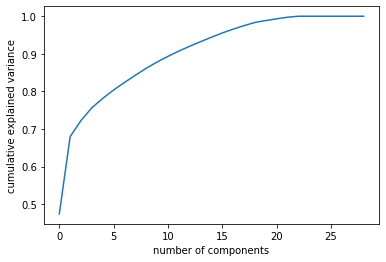

,0
0,0.474304
1,0.679952
2,0.722817
3,0.756834
4,0.781581
5,0.803926
6,0.824013
7,0.843092
8,0.861701
9,0.878357


In [40]:
from sklearn.decomposition import PCA

pca = PCA()
# pca.fit(X_train_select_quantrans)
pca.fit(X_train_1)

# plot
explained_variance = pca.explained_variance_ratio_
explained_variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

#### Notes:
- The top 23 principle components can explain all the variance, so we can pick these principle components as our new features.
- We can also check the colliearity again. As expected, the correlation coefficients between principle components are approximated zeros.

In [41]:
pca = PCA(n_components=23)

# X_train_4 = pd.concat([pd.DataFrame(pca.fit_transform(X_train_select_quantrans)),df_X_train_dummpy],axis=1)
# X_test_4 = pd.concat([pd.DataFrame(pca.fit_transform(X_test_select_quantrans)),df_X_test_dummpy],axis=1)
X_train_4 = pd.DataFrame(pca.fit_transform(X_train_1))
X_test_4 = pd.DataFrame(pca.transform(X_test_1))

y_train_4 = y_train_1
y_test_4 = y_test_1


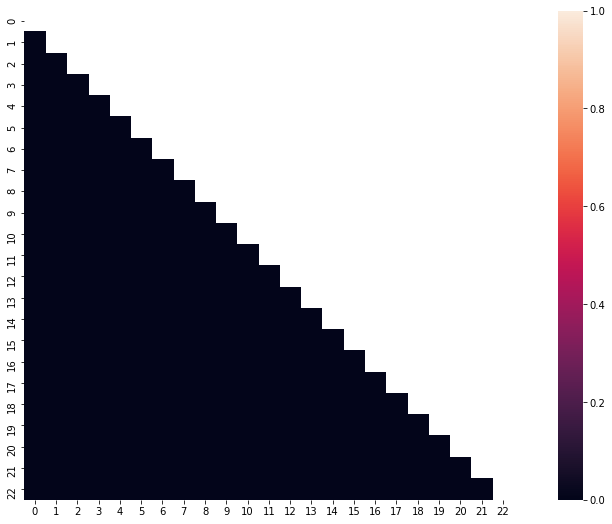

In [42]:
corr_matrix = pd.DataFrame(X_train_4).corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, square=True, mask=mask)

# Intermediate summary 

# Model Compare

### Base line result from "dumb model"
- We need a base line performance to start with. The bottom line is our machine learning model should at least outperformed such dumb model in metrics including accuracy, precision, recall, f1-score, etc.
- We can generate a random predictor as our dumb model. To make it less dumb, let's specify this radom predictor follow normal distribution, with mean=0.5, threshold=0.5. So half of the time it will predict as 1 (churn), the other half as 0 (not churn)
- We will evaluate the dumb model performance on the test set using several metrics, which is the outline for the rest of the model evaluation.

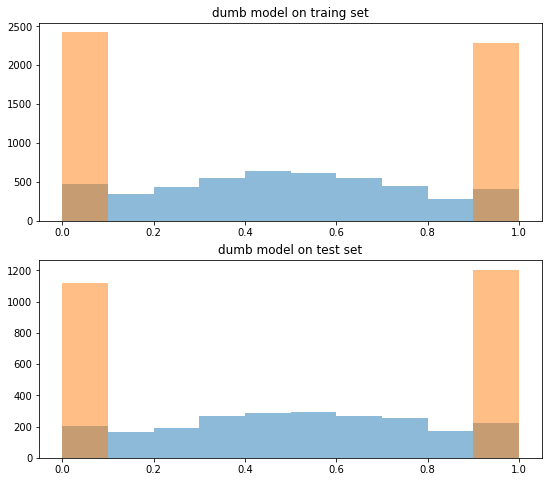

In [43]:
# generate normal distribution data set

import numpy as np
mean = 0.5
std = 0.3
min_size = 0
max_size = 1

plt.figure(figsize=(9,8))
# simulate result on training set
plt.subplot(2,1,1)
y_dumb_train_prob = np.clip((np.random.normal(mean,std, len(y_train))),min_size,max_size)
y_dumb_train_pred = np.round(y_dumb_train_prob)
plt.hist(y_dumb_train_prob, alpha=0.5)
plt.hist(y_dumb_train_pred, alpha=0.5)
plt.title('dumb model on traing set')
# plt.show()

df_dumb_train = pd.DataFrame({'churn_yes':y_dumb_train_pred, 'churn_prob':y_dumb_train_prob})
# df_dumb_train

# simulate result on test set
plt.subplot(2,1,2)
y_dumb_test_prob = np.clip((np.random.normal(mean,std, len(y_test))),min_size,max_size)
y_dumb_test_pred = np.round(y_dumb_test_prob)
plt.hist(y_dumb_test_prob, alpha=0.5)
plt.hist(y_dumb_test_pred, alpha=0.5)
plt.title('dumb model on test set')
plt.show()

df_dumb_test = pd.DataFrame({'churn_yes':y_dumb_test_pred, 'churn_prob':y_dumb_test_prob})
# df_dumb_test

In [44]:
# evaluation function
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score



def model_evaluation(y_test, y_pred, y_pred_prob=None):
    
# input:
# y_pred: dataframe, in [0,1]
# y_pred_prob: dataframe, between (0,1)
# y_test: dataframe, in [0,1]
# example: model_evaluation(y_test_1, df_dumb_model.churn_yes, df_dumb_model.churn_prob ):


    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test
    
# classification report
    print('classification_report')
    print(classification_report(y_test_tmp,y_pred_tmp, zero_division=0))

# confusion matrix
    plt.figure(figsize=(6,4))
    cf_matrix = confusion_matrix(y_pred_tmp, y_test_tmp, labels=[1,0])
    # X_axis_labels = y_test_1.unique()
    # Y_axis_labels = y_test_1.unique()
    # ax = sns.heatmap(cf_matrix, xticklabels=X_axis_labels, yticklabels=Y_axis_labels, annot=True, fmt="d", cmap="YlGnBu",square=True)
    sns.heatmap(cf_matrix, annot=True,  fmt="d", yticklabels=[1,0], xticklabels=[1,0])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    ax.hlines(np.arange(1,7), *ax.get_xlim())
    ax.vlines(np.arange(1,7), *ax.get_ylim())
    plt.show()

# plot ROC curve and precision-recall curve in one plot
    plt.figure(figsize=(6,4))
    # ROC plot
    if y_pred_prob is not None:
        fpr, tpr, threshold = roc_curve(y_test_tmp, y_pred_prob)
        threshold[0]=1
        roc_auc = auc(fpr, tpr)
    # plt.title('Receiver Operating Characteristic')
        plt.scatter(fpr, tpr, c='b', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)
#         plt.scatter(fpr, tpr, c=threshold, cmap='tab10', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)
    else:
        fpr, tpr, threshold = roc_curve(y_test_tmp, y_pred_tmp)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = 'ROC_AUC = %0.2f' % roc_auc)
    # plt.show()


    # precision-recall curve
    if y_pred_prob is not None:
        precision, recall, thresholds2 = precision_recall_curve(y_test_tmp, y_pred_prob)
        thresholds2 = np.append(thresholds2,1)
        pr_auc = auc(recall,precision)
#     average_precision = average_precision_score(y_test_tmp, y_pred_prob)
    
    # plt.scatter(precision, recall, 'g', label = 'AP = %0.2f' % average_precision)
        plt.scatter(precision, recall, c='g', s=1, label = 'PR_AUC = %0.2f' % pr_auc)
#         plt.scatter(precision, recall, c=thresholds2, cmap='tab10', s=1, label = 'PR_AUC = %0.2f' % pr_auc)
    else: 
        precision, recall, thresholds2 = precision_recall_curve(y_test_tmp, y_pred_tmp)
        pr_auc = auc(recall,precision)
        plt.plot(precision, recall, 'g', label = 'PR_AUC = %0.2f' % pr_auc)
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.title('Receiver Operating Characteristic/precision-recall curve in one plot')
    plt.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR/Recall')
    plt.xlabel('FPR, Precision')
#     plt.colorbar()
    plt.show()

classification_report
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      3452
           1       0.25      0.45      0.32      1259

    accuracy                           0.49      4711
   macro avg       0.48      0.47      0.45      4711
weighted avg       0.59      0.49      0.52      4711



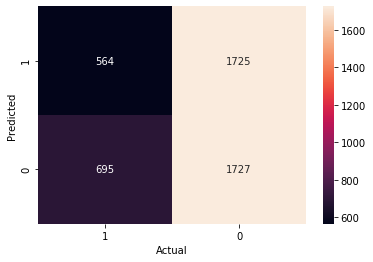

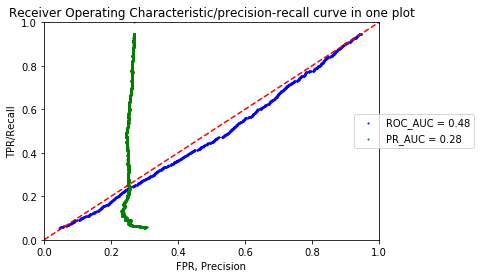

In [45]:
model_evaluation(y_test=y_train_1, y_pred=df_dumb_train.churn_yes, y_pred_prob=df_dumb_train.churn_prob )

classification_report
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      1711
           1       0.29      0.56      0.38       610

    accuracy                           0.51      2321
   macro avg       0.52      0.53      0.49      2321
weighted avg       0.64      0.51      0.54      2321



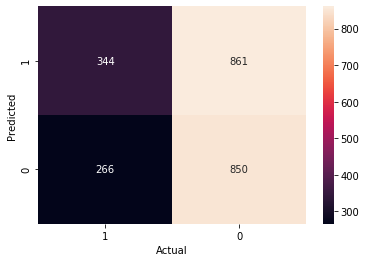

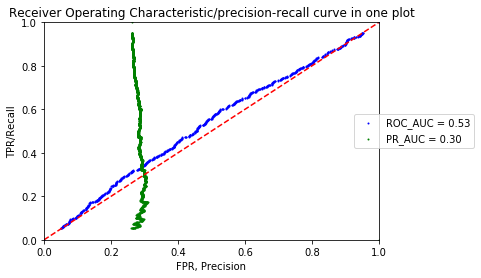

In [46]:
model_evaluation(y_test=y_test_1, y_pred=df_dumb_test.churn_yes, y_pred_prob=df_dumb_test.churn_prob )


#### Notes:
- We have generated a "dumb model" and evaluate its performance on the training set and test set.
- There exist many metrics to evaluate model performance, i.e. precision, recall, accuracy, etc. 
- For this specific classification task with imblanced labels, we will choose *"f1-score"* as the most important metric when comparing model perforance, since f1-score takees into account both precision and recall performance.
- Among other metics, f1-score value can be found in classification report, the one we will focus on is "f1" of churn or label 1. For the dumb model, its f1-score on training set and test set are 0.35 and 0.34, respectively.

# Machine learning model compare

### Logistic Regression (RG)

##### Training
- We can start with the default model, (meaning without tuning any of the hyper-parameters).

In [47]:
# train with the default model
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(   
#     C=1e-4,
#     penalty='l2',
#     solver='lbfgs',        
) 


lr1.fit(X=X_train_1, y=y_train_1)
lr1.get_params


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

##### Prediction and evaluation on test set


In [48]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lr1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lr1.predict(X_test_1))))

f1-score on training set: 0.6147826086956522
f1-score on test set: 0.5896269335759781


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.66      0.53      0.59       610

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



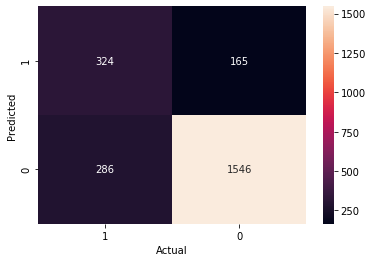

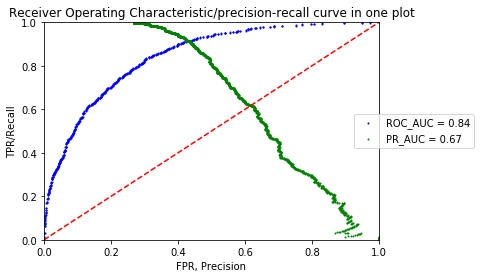

In [49]:
# evaluation metrics and visualization
y_pred_model = lr1.predict(X_test_1)
y_prob_model = lr1.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### Notes:
- Compare to the dumb model, the default logistic regression model performs much better in every metrics on both training set and test set.
- Also, when comparing the performanace on training set and test set, the f1-score didn't deteriate dramatically, so we should not be worry too much about overfitting in this case.
- But is it possible to improve the perforamnce by tuning the hyper-parameters? let's use GridSearchCV to find out.

## GridSearchCV verision
- Thy hyper-parameter of machine learning models can be tuned to improve performance. i.e. Inverse of regularization strength 'C' in logistic regress model
- Also, we can use grid search cross validation method to find out what would be the "best" hyper-parameters for a specific model.
- In this demo, we choose f1-score has metric when comparing model performance with different hyper-parameters. (since f1-score is a good balance to consider both precision and recall performance)
[use scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [50]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

lg = LogisticRegression() 
   
param_grid = {
    'C': [1e-4, 1e-2, 1e-0,  1e2],
    'tol': [0.0001, 0.00001],
        
}
# Create a based model
lg = LogisticRegression(solver='lbfgs')
# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 5, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_lr.fit(X_train_1, y_train_1)
print(grid_search_lr.best_score_)
print(grid_search_lr.best_estimator_.get_params)

0.6094375393430728
<bound method BaseEstimator.get_params of LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# the scores of best estimator at each cross-validatioin n-fold
n_fold = 5
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_search_lr.cv_results_['split'+str(fold)+'_test_score'][grid_search_lr.best_index_]))


test score in fold 0: 0.6164079822616408
test score in fold 1: 0.5738396624472573
test score in fold 2: 0.6230936819172113
test score in fold 3: 0.610752688172043
test score in fold 4: 0.6230936819172113


##### Prediction and evaluation on test set


In [52]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_lr.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_lr.predict(X_test_1))))

f1-score on training set: 0.615451388888889
f1-score on test set: 0.5874886672710788


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.66      0.53      0.59       610

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321



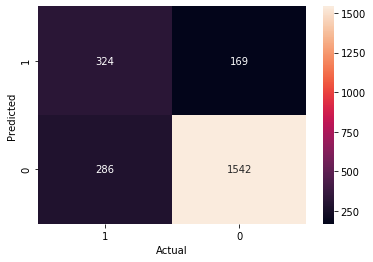

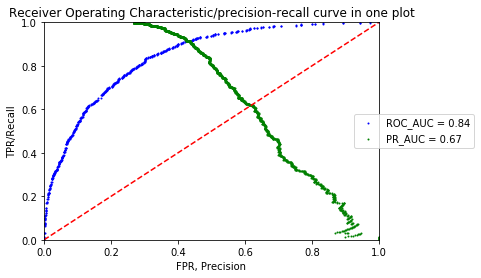

In [53]:
# evaluation metrics and visualization

y_pred_model = grid_search_lr.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_lr.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### Notes:
- It turned out the grid search model has the even a worse perforamnce than the default one. Sometimes this happens especially when using GridSearchCV method for parametric models like logistic regression. 
- Note that grid search CV is still very helpful so we will continue to use that, and hopefully to pay off in other situation.
- Note that it is possible to use certain more sophiscated hyper-parameter search approaches to optimize the searching process (i.e. less time, better performance). That being said, sometimes we need to search a wider range of hyper-parameter grid. But for illustration reason, we will demonstrate with simply grid with each hyper-parameter value close by the default sklearn settings.

### Trail with un-transformed data


##### check with the un-transformed data
Recall that, in the former feature engineering process, we have performed quatile transformation to reduce outliers and achieve normality. So, let's compare the performance using data with transformation and without.

In [54]:
lr2 = LogisticRegression(max_iter=1000)

lr2.fit(X=X_train_2, y=y_train_2)
lr2.get_params


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [55]:
# quick evaluation

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lr2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lr2.predict(X_test_2))))
print('----------------')
print('classification report on training set')
print(classification_report(y_true=y_train_2, y_pred=lr2.predict(X_train_2), zero_division=0))
print('classification report on test set')
print(classification_report(y_true=y_test_2, y_pred=lr2.predict(X_test_2), zero_division=0))

f1-score on training set: 0.6066838046272495
f1-score on test set: 0.5854092526690391
----------------
classification report on training set
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3452
           1       0.66      0.56      0.61      1259

    accuracy                           0.81      4711
   macro avg       0.75      0.73      0.74      4711
weighted avg       0.80      0.81      0.80      4711

classification report on test set
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.54      0.59       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321



#### Notes:
- It took more iteration for the model to converge, (i.e. we had increase max_iteration limit in this case)
- The performance deteriated comparing when using transformed data.
- Sometimes, the performance is so bad that the model might not even converge. (i.e. for SVM model)

### Trail with "SelectKBest" data


#### Train with the "SelectKBest" data
Recall that, in the former feature engineering process, we performed iterative collinear features elimination based on SelectKBest result. Now let's compare the performance using the data (version3).

In [56]:
lr3 = LogisticRegression()

lr3.fit(X=X_train_3, y=y_train_3)
lr3.get_params


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [57]:
# quick evaluation

print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=lr3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=lr3.predict(X_test_3))))
print('----------------')
print('classification report on training set')
print(classification_report(y_true=y_train_3, y_pred=lr3.predict(X_train_3), zero_division=0))
print('classification report on test set')
print(classification_report(y_true=y_test_3, y_pred=lr3.predict(X_test_3), zero_division=0))

f1-score on training set: 0.5901639344262295
f1-score on test set: 0.5664527956003667
----------------
classification report on training set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3452
           1       0.67      0.53      0.59      1259

    accuracy                           0.80      4711
   macro avg       0.75      0.72      0.73      4711
weighted avg       0.79      0.80      0.80      4711

classification report on test set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.64      0.51      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



#### Notes:
- The result is getting worse, even though it is not super bad.
- The reason why it gets worse is probabely because we lost information when eliminating features in the collinear pairs.

### Trail with "PCA" data


#### Train with the "PCA" data

In [58]:
lr4 = LogisticRegression()

lr4.fit(X=X_train_4, y=y_train_4)
lr4.get_params


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [59]:
# quick evaluation

print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=lr4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=lr4.predict(X_test_4))))
print('----------------')
print('classification report on training set')
print(classification_report(y_true=y_train_4, y_pred=lr4.predict(X_train_4), zero_division=0))
print('classification report on test set')
print(classification_report(y_true=y_test_4, y_pred=lr4.predict(X_test_4), zero_division=0))

f1-score on training set: 0.6147826086956522
f1-score on test set: 0.5896269335759781
----------------
classification report on training set
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3452
           1       0.68      0.56      0.61      1259

    accuracy                           0.81      4711
   macro avg       0.76      0.73      0.75      4711
weighted avg       0.80      0.81      0.81      4711

classification report on test set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.66      0.53      0.59       610

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



#### Notes:
- The f1-score when using data version 4 is exactely the same as data version 1. This is probabely just coninsidence.
- Pros of using PCA is that it addresses the collinearity problem without lossing information. Cons include loss of interpretability of the original data. So, when interpretability is not our priority, we can choose to use PCA.

In [60]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lr1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lr1.predict(X_test_1))))
print('----------')
print('Data1 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_lr.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_lr.predict(X_test_1))))
print('----------')
print('Data2 non-transformation')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=lr2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=lr2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=lr3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=lr3.predict(X_test_3))))
print('----------')
print('Data4 PCA')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=lr4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=lr4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.6147826086956522
f1-score on test set: 0.5896269335759781
----------
Data1 non-transformation + GridSearch
f1-score on training set: 0.615451388888889
f1-score on test set: 0.5874886672710788
----------
Data2 non-transformation
f1-score on training set: 0.6066838046272495
f1-score on test set: 0.5854092526690391
----------
Data3 SelectKBest
f1-score on training set: 0.5901639344262295
f1-score on test set: 0.5664527956003667
----------
Data4 PCA
f1-score on training set: 0.6147826086956522
f1-score on test set: 0.5896269335759781


#### intermediate summary
- We started with logistic regression model and demonstrated training and evaluation workflow. The key metric here is f1-score, since it is a good indicator for classification task with imblanced data.
- We compared the performance when feeding different versions of data from feature engineering.
- We also applied GridSearchCV method for hyper-parameter tuning.

For the rest of the analysis, we will work on model based on the similar analysis pipeline.
    - train and evaluate default model using data version 1.
    - train a GridSearchCV model suit using data version 1.
    - train GrdiSearchCV model suits using data version 2, 3, and 4.
so, the only difference later is to use GridSearchCV model suits instead of (single) default model for model comparing. 


## SVM

#### data v1

### training

In [61]:
from sklearn.svm import SVC

svmc1 = SVC()

svmc1.fit(X=X_train_1, y=y_train_1)
svmc1.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=svmc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=svmc1.predict(X_test_1))))

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1-score on training set: 0.6029877772747849
f1-score on test set: 0.5574387947269304


#### data v1 + GridSearchCV

In [62]:
# gridsearchcv
    
param_grid = {
#     'criterion': ['entropy', 'gini'],
    'C': [1e-2, 1e-0,  1e2],
#     'gamma': [1e7,1e5,1e3, 10, 1, 0.1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear'],        
}
# Create a based model
svmc = SVC(probability=True) 
# Instantiate the grid search model
grid_search_svm = GridSearchCV(estimator = svmc, param_grid = param_grid, 
                          cv = 5, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_svm.fit(X_train_1, y_train_1)
print(grid_search_svm.best_score_)
print(grid_search_svm.best_estimator_.get_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   59.1s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.60290807759353
<bound method BaseEstimator.get_params of SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)>


In [63]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_svm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_svm.predict(X_test_1))))

f1-score on training set: 0.6122807017543859
f1-score on test set: 0.582720588235294


In [64]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_svm
n_fold = 5
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))


test score in fold 0: 0.5924276169265034
test score in fold 1: 0.5646551724137931
test score in fold 2: 0.6260869565217392
test score in fold 3: 0.5995623632385121
test score in fold 4: 0.6318082788671023


classification_report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1711
           1       0.66      0.52      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.80      0.80      2321



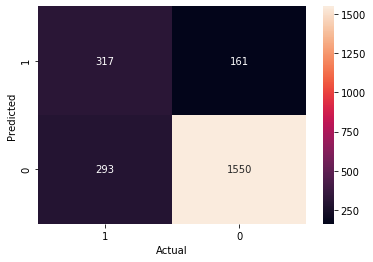

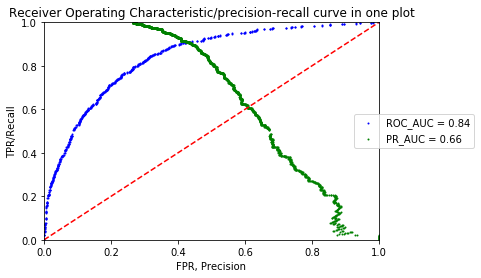

In [65]:
# evaluation metrics and visualization

y_pred_model = grid_search_svm.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_svm.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v2 + GridSearchCV

In [66]:
# gridsearchcv
    
param_grid = {
#     'criterion': ['entropy', 'gini'],
    'C': [1e-2, 1e-0,  1e2],
#     'gamma': [1e7,1e5,1e3, 10, 1, 0.1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear'],        
    'max_iter': [1e5],
}
# Create a based model
svmc = SVC(probability=True) 
# Instantiate the grid search model
grid_search_svm2 = GridSearchCV(estimator = svmc, param_grid = param_grid, 
                          cv = 5, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_svm2.fit(X_train_2, y_train_2)
print(grid_search_svm2.best_score_)
print(grid_search_svm2.best_estimator_.get_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   59.7s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.47171232194574564
<bound method BaseEstimator.get_params of SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100000.0, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [67]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_svm2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_svm2.predict(X_test_2))))

f1-score on training set: 0.47291666666666665
f1-score on test set: 0.4628450106157112


In [68]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_svm2
n_fold = 5
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))


test score in fold 0: 0.4363636363636364
test score in fold 1: 0.4769230769230769
test score in fold 2: 0.46997389033942555
test score in fold 3: 0.4806201550387597
test score in fold 4: 0.4946808510638298


classification_report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1711
           1       0.66      0.36      0.46       610

    accuracy                           0.78      2321
   macro avg       0.73      0.65      0.66      2321
weighted avg       0.76      0.78      0.76      2321



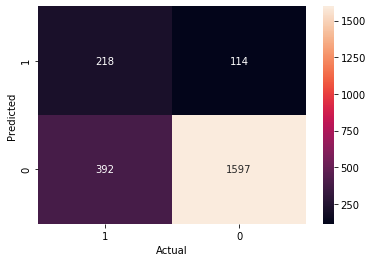

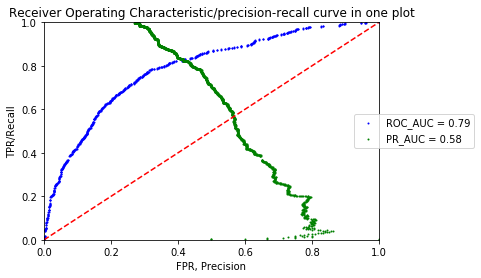

In [69]:
# evaluation metrics and visualization

y_pred_model = grid_search_svm2.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_svm2.best_estimator_.predict_proba(X_test_2)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_2, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### Notes:
- For SVM, it takes much more iteration to train data comparing to logistic regression. When using data without quantile transformation, the training time will take ever longer.
- In this demo, I limit the max_interation to 1e4, (while the default is unlimited). Whithout such modification, it almost took forever to train. As expected the performance is bad, because the SVM estimator failed to converge.

#### Data v3 + GridSearchCV

In [70]:
# gridsearchcv
    
param_grid = {
#     'criterion': ['entropy', 'gini'],
    'C': [1e-2, 1e-0,  1e2],
#     'gamma': [1e7,1e5,1e3, 10, 1, 0.1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear'],        
}
# Create a based model
svmc = SVC(probability=True) 
# Instantiate the grid search model
grid_search_svm3 = GridSearchCV(estimator = svmc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_svm3.fit(X_train_3, y_train_3)
print(grid_search_svm3.best_score_)
print(grid_search_svm3.best_estimator_.get_params)

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5599070341821915
<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)>


In [71]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_svm3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_svm3.predict(X_test_3))))

f1-score on training set: 0.6105747126436781
f1-score on test set: 0.5493230174081238


In [72]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_svm3
n_fold = 3
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))


test score in fold 0: 0.5586592178770949
test score in fold 1: 0.5472222222222223
test score in fold 2: 0.5738396624472573


classification_report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1711
           1       0.67      0.47      0.55       610

    accuracy                           0.80      2321
   macro avg       0.75      0.69      0.71      2321
weighted avg       0.79      0.80      0.79      2321



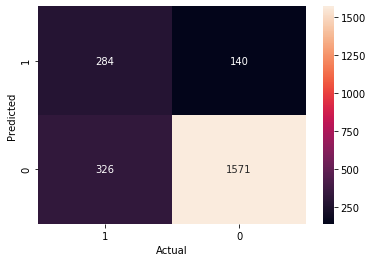

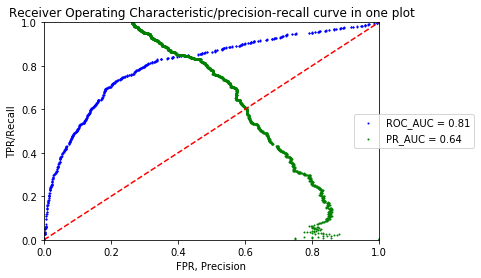

In [73]:
# evaluation metrics and visualization

y_pred_model = grid_search_svm3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_svm3.best_estimator_.predict_proba(X_test_3)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_3, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### Data v4 + GridSearchCV

In [74]:
# gridsearchcv
    
param_grid = {
#     'criterion': ['entropy', 'gini'],
    'C': [1e-2, 1e-0,  1e2],
#     'gamma': [1e7,1e5,1e3, 10, 1, 0.1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear'],        
}
# Create a based model
svmc = SVC(probability=True)  
# Instantiate the grid search model
grid_search_svm4 = GridSearchCV(estimator = svmc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_svm4.fit(X_train_4, y_train_4)
print(grid_search_svm4.best_score_)
print(grid_search_svm4.best_estimator_.get_params)

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6028158303197569
<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)>


In [75]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_svm4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_svm4.predict(X_test_4))))

f1-score on training set: 0.6104523495827845
f1-score on test set: 0.5819521178637199


In [76]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_svm4
n_fold = 3
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))


test score in fold 0: 0.6010498687664042
test score in fold 1: 0.5918097754293263
test score in fold 2: 0.6155878467635403


classification_report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1711
           1       0.66      0.52      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.80      0.80      2321



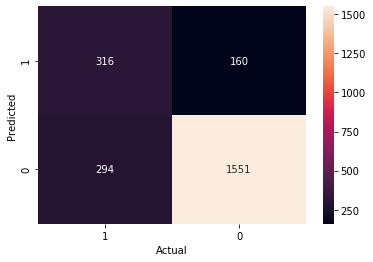

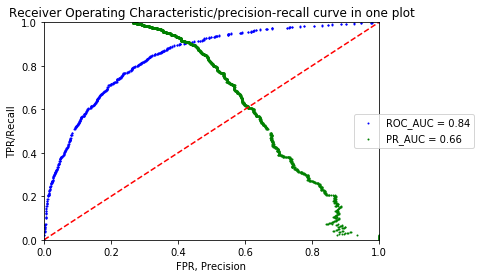

In [77]:
# evaluation metrics and visualization

y_pred_model = grid_search_svm4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_svm4.best_estimator_.predict_proba(X_test_4)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_4, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [78]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=svmc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=svmc1.predict(X_test_1))))
print('----------')
print('Data1  + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_svm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_svm.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_svm2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_svm2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_svm3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_svm3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_svm4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_svm4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.6029877772747849
f1-score on test set: 0.5574387947269304
----------
Data1  + GridSearch
f1-score on training set: 0.6122807017543859
f1-score on test set: 0.582720588235294
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.47291666666666665
f1-score on test set: 0.4628450106157112
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.6105747126436781
f1-score on test set: 0.5493230174081238
----------
Data4 PCA + GridSearch
f1-score on training set: 0.6104523495827845
f1-score on test set: 0.5819521178637199


#### Intermediate summary:
- As mentioned before, an essential reason we perform gridsearchCV is it can help avoid overfitting, and generate model that is more generalized to unseen data.
- From the SVM example we can see that, when comparing the default model vs. the best grid-searched-CV model. The default model has higer f1-score in training set, the score dropped in test set; while the grid-searched model is more generalized, and the difference of f1-score between training set and test set is smaller.
- However the SVM model doesn't outperform logistic regression model. (evaluated by f1-score). Also it takes longer for SVM to train the data compared to logistic regression.

### KNN
#### data v1

### training

In [79]:

from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()

knn1.fit(X=X_train_1, y=y_train_1)
knn1.get_params

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

##### Prediction and evaluation on test set


In [80]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=knn1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=knn1.predict(X_test_1))))

f1-score on training set: 0.6898011002962335
f1-score on test set: 0.5426356589147286


##### notice that the score dropped dramatically which indicates overfitting. So, in our gridsearchCV process, we can increase k value

#### data v1 + GridSearchCV

In [81]:
# Gridsearch CV

param_grid = {
    'n_neighbors': [5, 50, 100, 150, 200, 250, 300],
    'weights': ['uniform', 'distance'],
    'leaf_size':[30, 60, 90],
        
}
# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_knn.fit(X_train_1, y_train_1)
print(grid_search_knn.best_score_)
print(grid_search_knn.best_estimator_.get_params)

0.6021737529627496
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='uniform')>


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [82]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_knn.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_knn.predict(X_test_1))))

f1-score on training set: 0.6023166023166023
f1-score on test set: 0.5800176834659593


In [83]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_knn
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5894206549118387
test score in fold 1: 0.5828295042321644
test score in fold 2: 0.6342710997442456
average: 0.6021737529627496


classification_report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1711
           1       0.63      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



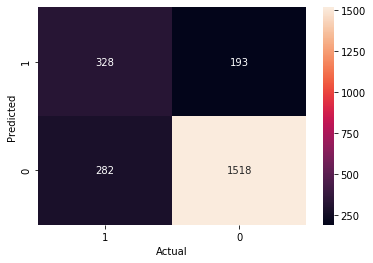

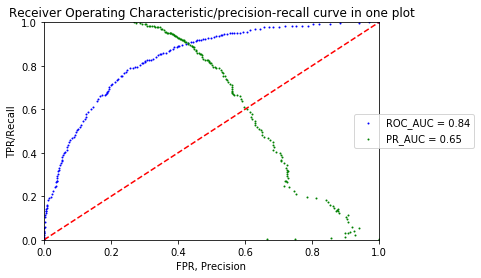

In [84]:
# evaluation metrics and visualization

y_pred_model = grid_search_knn.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_knn.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v2 + GridSearchCV

In [85]:
# Gridsearch CV

param_grid = {
    'n_neighbors': [5, 50, 100, 150, 200, 250, 300],
    'weights': ['uniform', 'distance'],
    'leaf_size':[30, 60, 90],
        
}
# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search_knn2 = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_knn2.fit(X_train_2, y_train_2)
print(grid_search_knn2.best_score_)
print(grid_search_knn2.best_estimator_.get_params)

0.5092527118414102
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')>


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [86]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_knn2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_knn2.predict(X_test_2))))

f1-score on training set: 0.9976133651551312
f1-score on test set: 0.5213523131672598


In [87]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_knn2
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.49935979513444295
test score in fold 1: 0.518331226295828
test score in fold 2: 0.5100671140939597
average: 0.5092527118414102


classification_report
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1711
           1       0.57      0.48      0.52       610

    accuracy                           0.77      2321
   macro avg       0.70      0.68      0.68      2321
weighted avg       0.76      0.77      0.76      2321



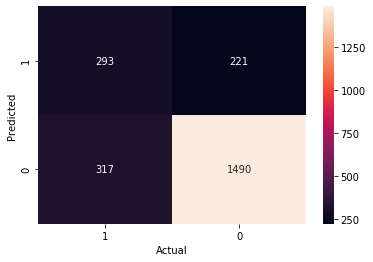

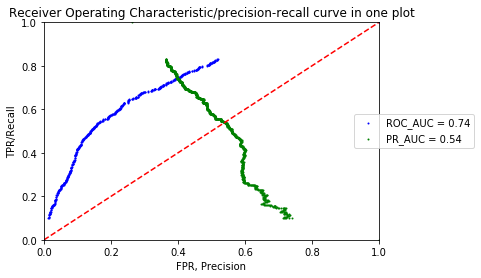

In [88]:
# evaluation metrics and visualization

y_pred_model = grid_search_knn2.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_knn2.best_estimator_.predict_proba(X_test_2)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

### data v3 + GridSearchCV

In [89]:
# Gridsearch CV

param_grid = {
    'n_neighbors': [5, 50, 100, 150, 200, 250, 300],
    'weights': ['uniform', 'distance'],
    'leaf_size':[30, 60, 90],
        
}
# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search_knn3 = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_knn3.fit(X_train_3, y_train_3)
print(grid_search_knn3.best_score_)
print(grid_search_knn3.best_estimator_.get_params)

0.5696685966626607
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='distance')>


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [90]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_knn3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_knn3.predict(X_test_3))))

f1-score on training set: 0.9972144846796657
f1-score on test set: 0.5596330275229359


In [91]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_knn3
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5516304347826088
test score in fold 1: 0.5696202531645571
test score in fold 2: 0.5877551020408163
average: 0.5696685966626607


classification_report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1711
           1       0.64      0.50      0.56       610

    accuracy                           0.79      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321



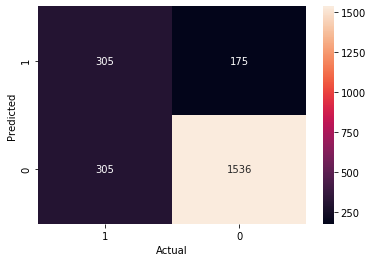

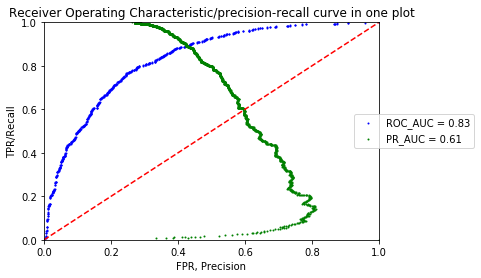

In [92]:
# evaluation metrics and visualization

y_pred_model = grid_search_knn3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_knn3.best_estimator_.predict_proba(X_test_3)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_3, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v4 + GridSearchCV

In [93]:
# Gridsearch CV

param_grid = {
    'n_neighbors': [5, 50, 100, 150, 200, 250, 300],
    'weights': ['uniform', 'distance'],
    'leaf_size':[30, 60, 90],
        
}
# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search_knn4 = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 0)


# Fit the random search model
_ = grid_search_knn4.fit(X_train_4, y_train_4)
print(grid_search_knn4.best_score_)
print(grid_search_knn4.best_estimator_.get_params)

0.6021737529627496
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='uniform')>


C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [94]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_knn4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_knn4.predict(X_test_4))))

f1-score on training set: 0.6023166023166023
f1-score on test set: 0.5800176834659593


In [95]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_knn4
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5894206549118387
test score in fold 1: 0.5828295042321644
test score in fold 2: 0.6342710997442456
average: 0.6021737529627496


classification_report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1711
           1       0.63      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



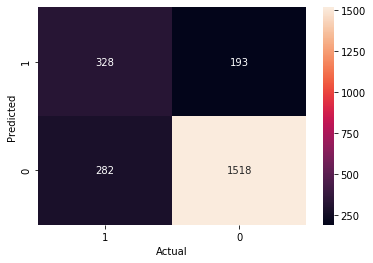

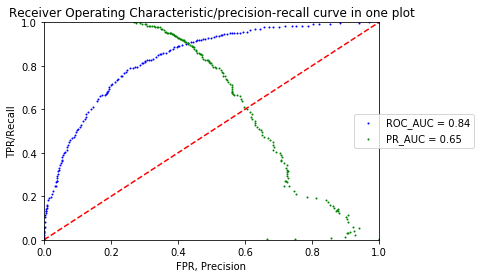

In [96]:
# evaluation metrics and visualization

y_pred_model = grid_search_knn4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_knn4.best_estimator_.predict_proba(X_test_4)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_4, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [97]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=knn1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=knn1.predict(X_test_1))))
print('----------')
print('Data1 + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_knn.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_knn.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_knn2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_knn2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_knn3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_knn3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_knn4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_knn4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.6898011002962335
f1-score on test set: 0.5426356589147286
----------
Data1 + GridSearch
f1-score on training set: 0.6023166023166023
f1-score on test set: 0.5800176834659593
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.9976133651551312
f1-score on test set: 0.5213523131672598
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.9972144846796657
f1-score on test set: 0.5596330275229359
----------
Data4 PCA + GridSearch
f1-score on training set: 0.6023166023166023
f1-score on test set: 0.5800176834659593


#### Notes:
- We try to prevent overfitting by using cross-vadlidation, but the parameter tuned by GridSearchCV seems not work well with KNN. (look at the extreme overfitting in data2 and data3).
- Actually the k-neighbour parameter is sensitive to the data size. So it is not very meaningful to compare training set performance with test set. When looking back at the n-fold cross validation perforamnce, the overfitting is not that bad even for data2 and data3 model suits.
- KNN is also sensitive to data scale, without some sort fo standardization, KNN will perform badly (data version 2).
- For this model, the KNN model performs no better than logistic regression or SVM. And we 

### Naive Bayes


##### data v1

##### training

In [98]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()

nb1.fit(X=X_train_1, y=y_train_1)
nb1.get_params

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

In [99]:
# quick evaluation

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=nb1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=nb1.predict(X_test_1))))

f1-score on training set: 0.5837751855779427
f1-score on test set: 0.5748116254036598


##### data v1 + GridSearchCV

In [100]:
# Gridsearch CV

param_grid = {
    'var_smoothing': [1e-15,  1e-12,  1e-8],
    
        
}
# Create a based model
nb = GaussianNB()
# Instantiate the grid search model
grid_search_nb = GridSearchCV(estimator = nb, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_nb.fit(X_train_1, y_train_1)
print(grid_search_nb.best_score_)
print(grid_search_nb.best_estimator_.get_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.5840941124604372
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-15)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_nb.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_nb.predict(X_test_1))))

f1-score on training set: 0.5837751855779427
f1-score on test set: 0.5748116254036598


In [102]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_nb
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.585483870967742
test score in fold 1: 0.5834004834810637
test score in fold 2: 0.5833979829325059
average: 0.5840941124604372


classification_report
              precision    recall  f1-score   support

           0       0.93      0.58      0.72      1711
           1       0.43      0.88      0.57       610

    accuracy                           0.66      2321
   macro avg       0.68      0.73      0.65      2321
weighted avg       0.80      0.66      0.68      2321



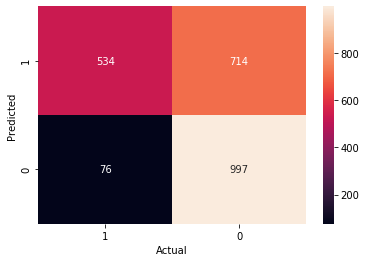

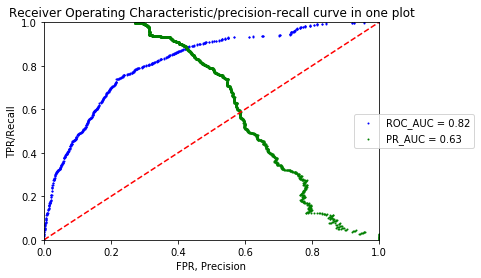

In [103]:
# evaluation metrics and visualization
y_pred_model = grid_search_nb.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_nb.best_estimator_.predict_proba(X_test_1)[:,1]

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

##### data v2 + GridSearchCV

In [104]:
# Gridsearch CV

param_grid = {
    'var_smoothing': [1e-15,  1e-12,  1e-8],
    
        
}
# Create a based model
nb = GaussianNB()
# Instantiate the grid search model
grid_search_nb2 = GridSearchCV(estimator = nb, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_nb2.fit(X_train_2, y_train_2)
print(grid_search_nb2.best_score_)
print(grid_search_nb2.best_estimator_.get_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.5840428904514853
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-15)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_nb2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_nb2.predict(X_test_2))))

f1-score on training set: 0.5877005347593584
f1-score on test set: 0.5760693015701136


In [106]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_nb2
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5846905537459284
test score in fold 1: 0.580960130187144
test score in fold 2: 0.5864779874213836
average: 0.5840428904514853


classification_report
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1711
           1       0.43      0.87      0.58       610

    accuracy                           0.66      2321
   macro avg       0.68      0.73      0.65      2321
weighted avg       0.80      0.66      0.68      2321



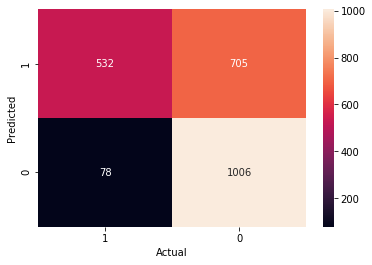

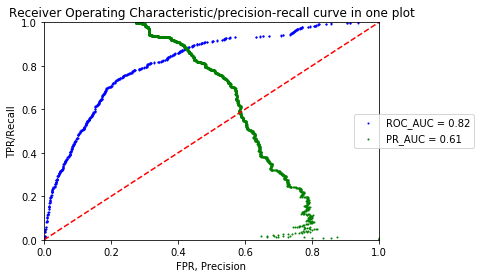

In [107]:
# evaluation metrics and visualization
y_pred_model = grid_search_nb2.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_nb2.best_estimator_.predict_proba(X_test_2)[:,1]

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

##### data v3 + GridSearchCV

In [108]:
# Gridsearch CV

param_grid = {
    'var_smoothing': [1e-15,  1e-12,  1e-8],
    
        
}
# Create a based model
nb = GaussianNB()
# Instantiate the grid search model
grid_search_nb3 = GridSearchCV(estimator = nb, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_nb3.fit(X_train_3, y_train_3)
print(grid_search_nb3.best_score_)
print(grid_search_nb3.best_estimator_.get_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.6089501269073646
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-15)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_nb3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_nb3.predict(X_test_3))))

f1-score on training set: 0.6177330302046119
f1-score on test set: 0.6093333333333333


In [110]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_nb3
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5949612403100775
test score in fold 1: 0.5881207400194742
test score in fold 2: 0.6437684003925418
average: 0.6089501269073646


classification_report
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1711
           1       0.51      0.75      0.61       610

    accuracy                           0.75      2321
   macro avg       0.70      0.75      0.71      2321
weighted avg       0.79      0.75      0.76      2321



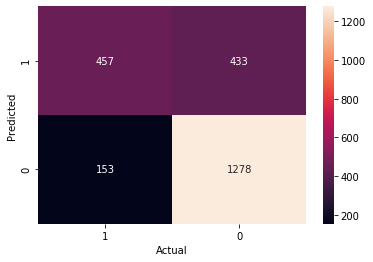

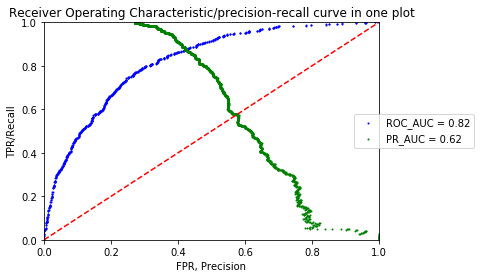

In [111]:
# evaluation metrics and visualization
y_pred_model = grid_search_nb3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_nb3.best_estimator_.predict_proba(X_test_3)[:,1]

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

##### data v4 + GridSearchCV

In [112]:
# Gridsearch CV

param_grid = {
    'var_smoothing': [1e-15,  1e-12,  1e-8],
    
        
}
# Create a based model
nb = GaussianNB()
# Instantiate the grid search model
grid_search_nb4 = GridSearchCV(estimator = nb, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_nb4.fit(X_train_4, y_train_4)
print(grid_search_nb4.best_score_)
print(grid_search_nb4.best_estimator_.get_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.6063742238899554
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-15)>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_nb4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_nb4.predict(X_test_4))))

f1-score on training set: 0.612509534706331
f1-score on test set: 0.6028481012658228


In [114]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_nb4
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.6202247191011235
test score in fold 1: 0.5607476635514019
test score in fold 2: 0.6381502890173409
average: 0.6063742238899554


classification_report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1711
           1       0.58      0.62      0.60       610

    accuracy                           0.78      2321
   macro avg       0.72      0.73      0.73      2321
weighted avg       0.79      0.78      0.79      2321



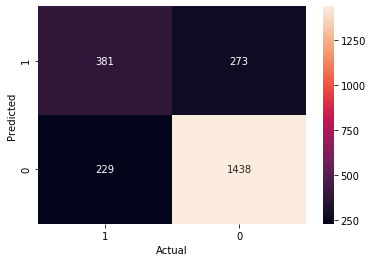

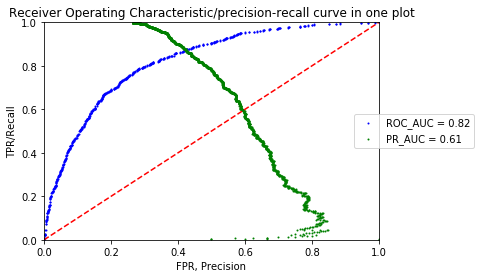

In [115]:
# evaluation metrics and visualization
y_pred_model = grid_search_nb4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_nb4.best_estimator_.predict_proba(X_test_4)[:,1]

model_evaluation(y_test=y_test_4, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [116]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=nb1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=nb1.predict(X_test_1))))
print('----------')
print('Data1 + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_nb.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_nb.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_nb2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_nb2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_nb3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_nb3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_nb4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_nb4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.5837751855779427
f1-score on test set: 0.5748116254036598
----------
Data1 + GridSearch
f1-score on training set: 0.5837751855779427
f1-score on test set: 0.5748116254036598
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.5877005347593584
f1-score on test set: 0.5760693015701136
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.6177330302046119
f1-score on test set: 0.6093333333333333
----------
Data4 PCA + GridSearch
f1-score on training set: 0.612509534706331
f1-score on test set: 0.6028481012658228


In [117]:
print (grid_search_nb.cv_results_['rank_test_score'])
print (grid_search_nb2.cv_results_['rank_test_score'])
print (grid_search_nb3.cv_results_['rank_test_score'])
print (grid_search_nb4.cv_results_['rank_test_score'])

[1 1 1]
[1 1 3]
[1 1 1]
[1 1 1]


#### Intermediate summary:
- Finally, we have some model outperformed logistic regression.
- Naive Bayes model assumes Nomarl distribution (just as its name GaussianNB indicated), and assume independency. So it is not supprised data3 and data4 suits, which reduce coolinearity, have better performance.
- There is not much space to tune the parameter of Naive Bayes model. We tried to tune "var_smoothing" parameter, but the ranking based on f1-score is essentially the same. So, we might just use the default model would be enough.
- Also it is very fast to compute.

## Decision Tree

#### data v1

### training

In [118]:
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier()

dtc1.fit(X=X_train_1, y=y_train_1)
dtc1.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

##### Prediction and evaluation on test set


In [119]:

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=dtc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=dtc1.predict(X_test_1))))

f1-score on training set: 0.9976133651551312
f1-score on test set: 0.4980544747081712


Apparently, there is overfitting. So we need to fix that by tuning the hyperparameters.

#### data v1 + GridSearchCV

In [120]:
# Gridsearch CV

param_grid = {
    'max_depth': [8, 10, 40, 80, None],
    'min_samples_leaf': [4, 8, 12, 16, 32],
    'min_samples_split':[2, 3, 5, 8,],
        
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_dtc.fit(X_train_1, y_train_1)
print(grid_search_dtc.best_score_)
print(grid_search_dtc.best_estimator_.get_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


0.5809055888454284
<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


In [121]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_dtc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_dtc.predict(X_test_1))))

f1-score on training set: 0.6463257412978083
f1-score on test set: 0.5419240953221535


In [122]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_dtc
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5877957658779576
test score in fold 1: 0.548469387755102
test score in fold 2: 0.6064516129032258
average: 0.5809055888454284


classification_report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1711
           1       0.59      0.50      0.54       610

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.77      0.78      0.77      2321



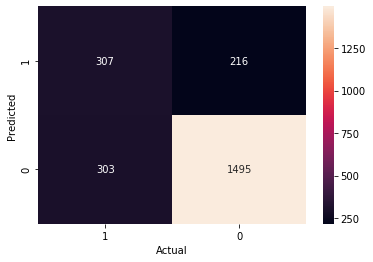

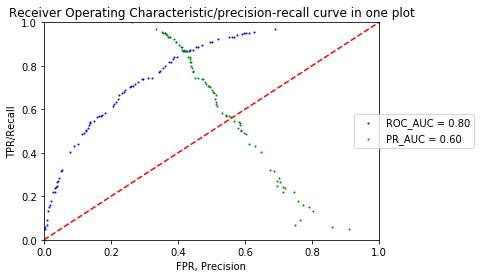

In [123]:
# evaluation metrics and visualization
y_pred_model = grid_search_dtc.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_dtc.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v2 + GridSearchCV

In [124]:
# Gridsearch CV

param_grid = {
    'max_depth': [8, 10, 40, 80, None],
    'min_samples_leaf': [4, 8, 12, 16, 32],
    'min_samples_split':[2, 3, 5, 8,],
        
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dtc2 = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_dtc2.fit(X_train_2, y_train_2)
print(grid_search_dtc2.best_score_)
print(grid_search_dtc2.best_estimator_.get_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


0.5794043168942679
<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


In [125]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_dtc2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_dtc2.predict(X_test_2))))

f1-score on training set: 0.6463257412978083
f1-score on test set: 0.5419240953221535


In [126]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_dtc2
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5877957658779576
test score in fold 1: 0.5447470817120622
test score in fold 2: 0.6056701030927835
average: 0.5794043168942679


classification_report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1711
           1       0.59      0.50      0.54       610

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.77      0.78      0.77      2321



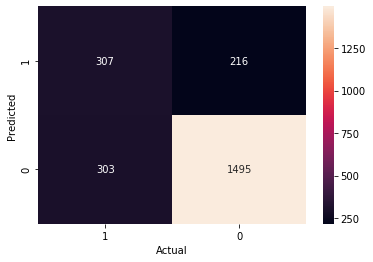

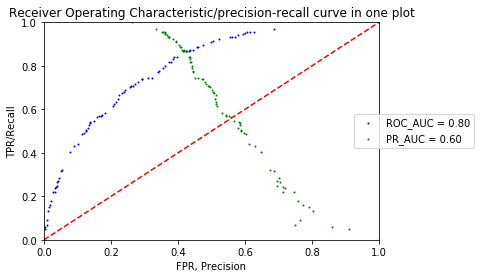

In [127]:
# evaluation metrics and visualization
y_pred_model = grid_search_dtc2.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_dtc2.best_estimator_.predict_proba(X_test_2)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

### data v3 + GridSearchCV

In [128]:
# Gridsearch CV

param_grid = {
    'max_depth': [8, 10, 40, 80, None],
    'min_samples_leaf': [4, 8, 12, 16, 32],
    'min_samples_split':[2, 3, 5, 8,],
        
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dtc3 = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_dtc3.fit(X_train_3, y_train_3)
print(grid_search_dtc3.best_score_)
print(grid_search_dtc3.best_estimator_.get_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


0.5753155460191178
<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished


In [129]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_dtc3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_dtc3.predict(X_test_3))))

f1-score on training set: 0.6347517730496454
f1-score on test set: 0.556350626118068


In [130]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_dtc3
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5551232166018158
test score in fold 1: 0.5565912117177098
test score in fold 2: 0.6142322097378278
average: 0.5753155460191178


classification_report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1711
           1       0.61      0.51      0.56       610

    accuracy                           0.79      2321
   macro avg       0.72      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321



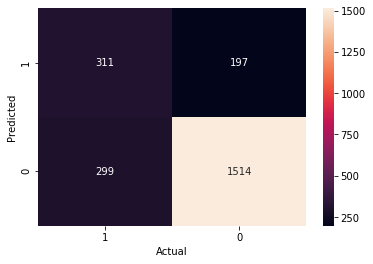

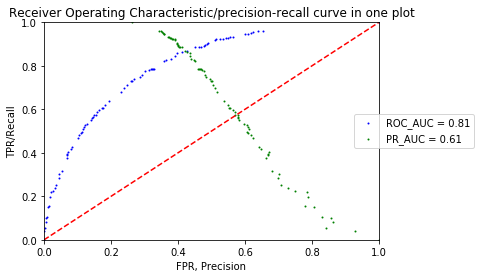

In [131]:
# evaluation metrics and visualization
y_pred_model = grid_search_dtc3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_dtc3.best_estimator_.predict_proba(X_test_3)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_3, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v4 + GridSearchCV

In [132]:
# Gridsearch CV

param_grid = {
    'max_depth': [8, 10, 40, 80, None],
    'min_samples_leaf': [4, 8, 12, 16, 32],
    'min_samples_split':[2, 3, 5, 8,],
        
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dtc4 = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_dtc4.fit(X_train_4, y_train_4)
print(grid_search_dtc4.best_score_)
print(grid_search_dtc4.best_estimator_.get_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


0.543255943781383
<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


In [133]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_dtc4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_dtc4.predict(X_test_4))))

f1-score on training set: 0.7111501316944688
f1-score on test set: 0.5203989120580235


In [134]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_dtc4
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5387453874538746
test score in fold 1: 0.5
test score in fold 2: 0.5910224438902744
average: 0.543255943781383


classification_report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1711
           1       0.58      0.47      0.52       610

    accuracy                           0.77      2321
   macro avg       0.70      0.68      0.69      2321
weighted avg       0.76      0.77      0.76      2321



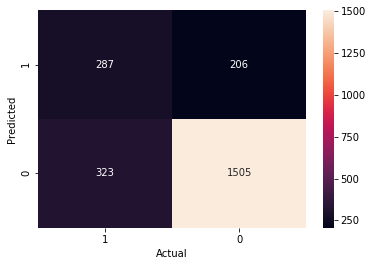

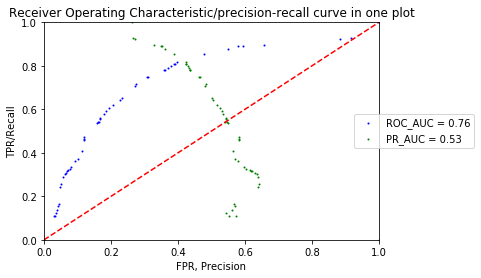

In [135]:
# evaluation metrics and visualization
y_pred_model = grid_search_dtc4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_dtc4.best_estimator_.predict_proba(X_test_4)[:,1]
# y_prob_model = y_pred_model
# y_prob_model
model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [136]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=dtc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=dtc1.predict(X_test_1))))
print('----------')
print('Data1 + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_dtc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_dtc.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_dtc2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_dtc2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_dtc3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_dtc3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_dtc4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_dtc4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.9976133651551312
f1-score on test set: 0.4980544747081712
----------
Data1 + GridSearch
f1-score on training set: 0.6463257412978083
f1-score on test set: 0.5419240953221535
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.6463257412978083
f1-score on test set: 0.5419240953221535
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.6347517730496454
f1-score on test set: 0.556350626118068
----------
Data4 PCA + GridSearch
f1-score on training set: 0.7111501316944688
f1-score on test set: 0.5203989120580235


#### Intermediate summary
- The problem of decision tree is overfitting. We have spotted twice there were big drop between training set and test set.
- Note that, the computation time is not a burden for single decision tree. However to tune the hyperparameter can be tedious. And it is hard to find the best hyperparameter combination by just eyeballing it. So tuning hyparameter can take some time.
- Also it doesn't seem to improve using SelectKBest or PCA data (data version3 and version4 respectively)


## Random Forest
#### training, prediction, and evaluation using default settings.

#### Data v1

In [137]:

from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()

rfc1.fit(X=X_train_1, y=y_train_1)
print(rfc1.get_params)

y_pred_model = rfc1.predict(X_test_1)
y_prob_model = rfc1.predict_proba(X_test_1)[:,1]
# y_prob_model

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=rfc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=rfc1.predict(X_test_1))))

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>
f1-score on training set: 0.9976171564733916
f1-score on test set: 0.5456221198156682


##### It is definitely overfitting. Let's tune it using grid search cv

#### data v1 + GridSearchCV

In [138]:
# Gridsearch CV

param_grid = {
    'n_estimators':[100, 150],
    'max_depth': [ 8, 12, ],
    'min_samples_leaf': [ 4, 8, 16, ],
    'min_samples_split':[ 4, 8,],
    'max_features':['auto', 0.9]
    
        
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_rfc.fit(X_train_1, y_train_1)
print(grid_search_rfc.best_score_)
print(grid_search_rfc.best_estimator_.get_params)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   13.3s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.5898584900049095
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [139]:

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_rfc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_rfc.predict(X_test_1))))

f1-score on training set: 0.7081297201243891
f1-score on test set: 0.5647279549718575


In [140]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_rfc
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5933774834437086
test score in fold 1: 0.571041948579161
test score in fold 2: 0.6051560379918589
average: 0.5898584900049095


classification_report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1711
           1       0.66      0.49      0.56       610

    accuracy                           0.80      2321
   macro avg       0.75      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



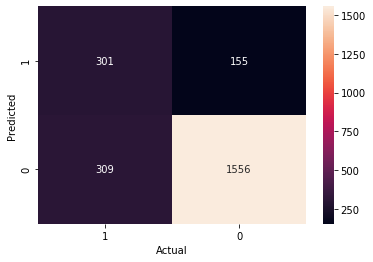

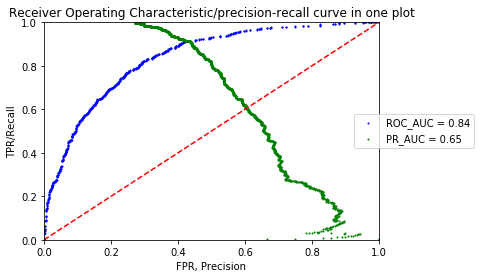

In [141]:
# evaluation metrics and visualization
y_pred_model = grid_search_rfc.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_rfc.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v2 + GridSearchCV

In [142]:
# Gridsearch CV

param_grid = {
    'n_estimators':[100, 150],
    'max_depth': [ 8, 12, ],
    'min_samples_leaf': [ 4, 8, 16, ],
    'min_samples_split':[ 4, 8,],
    'max_features':['auto', 0.9]
    
        
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rfc2 = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_rfc2.fit(X_train_2, y_train_2)
print(grid_search_rfc2.best_score_)
print(grid_search_rfc2.best_estimator_.get_params)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   13.7s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.5867427768874519
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [143]:

print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_rfc2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_rfc2.predict(X_test_2))))

f1-score on training set: 0.7061442564559217
f1-score on test set: 0.5682031984948259


In [144]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_rfc2
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5913272010512483
test score in fold 1: 0.5629228687415426
test score in fold 2: 0.6059782608695651
average: 0.5867427768874519


classification_report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1711
           1       0.67      0.50      0.57       610

    accuracy                           0.80      2321
   macro avg       0.75      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



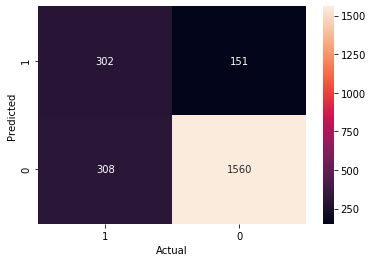

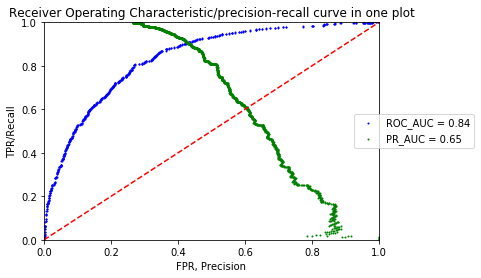

In [145]:
# evaluation metrics and visualization
y_pred_model = grid_search_rfc2.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_rfc2.best_estimator_.predict_proba(X_test_2)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v3 + GridSearchCV

In [146]:
# Gridsearch CV

param_grid = {
    'n_estimators':[100, 150],
    'max_depth': [ 8, 12, ],
    'min_samples_leaf': [ 4, 8, 16, ],
    'min_samples_split':[ 4, 8,],
    'max_features':['auto', 0.9]
    
        
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rfc3 = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_rfc3.fit(X_train_3, y_train_3)
print(grid_search_rfc3.best_score_)
print(grid_search_rfc3.best_estimator_.get_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   22.2s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.5878002943716607
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [147]:

print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_rfc3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_rfc3.predict(X_test_3))))

f1-score on training set: 0.7068736141906874
f1-score on test set: 0.5685740236148955


In [148]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_rfc3
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5816554809843401
test score in fold 1: 0.5702127659574467
test score in fold 2: 0.5995623632385121
average: 0.583810203393433


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.64      0.51      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



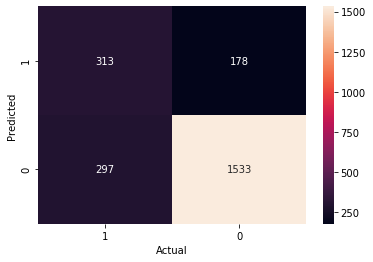

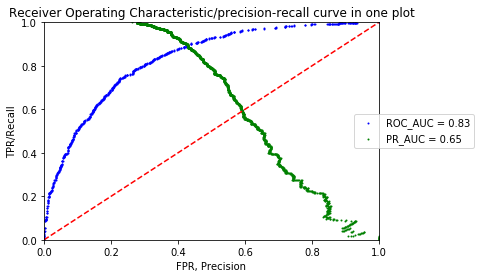

In [149]:
# evaluation metrics and visualization
y_pred_model = grid_search_rfc3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_rfc3.best_estimator_.predict_proba(X_test_3)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_3, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v4 + GridSearchCV

In [150]:
# Gridsearch CV

param_grid = {
    'n_estimators':[100, 150],
    'max_depth': [ 8, 12, ],
    'min_samples_leaf': [ 4, 8, 16, ],
    'min_samples_split':[ 4, 8,],
    'max_features':['auto', 0.9]
    
        
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rfc4 = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_rfc4.fit(X_train_4, y_train_4)
print(grid_search_rfc4.best_score_)
print(grid_search_rfc4.best_estimator_.get_params)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   44.2s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.5871119448289613
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [151]:

print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_rfc4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_rfc4.predict(X_test_4))))

f1-score on training set: 0.7769097222222221
f1-score on test set: 0.5624421831637374


In [152]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_rfc4
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5883905013192612
test score in fold 1: 0.5536423841059602
test score in fold 2: 0.6193029490616623
average: 0.5871119448289613


classification_report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1711
           1       0.65      0.50      0.56       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.71      2321
weighted avg       0.78      0.80      0.79      2321



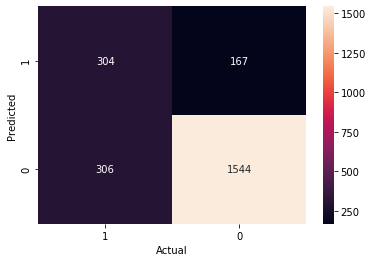

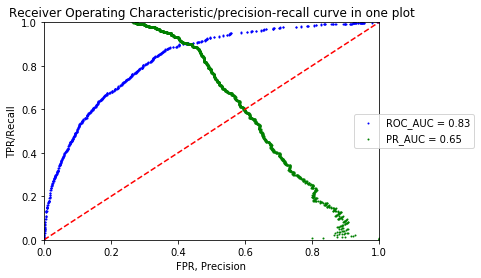

In [153]:
# evaluation metrics and visualization
y_pred_model = grid_search_rfc4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_rfc4.best_estimator_.predict_proba(X_test_4)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_4, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [154]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=rfc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=rfc1.predict(X_test_1))))
print('----------')
print('Data1 + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_rfc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_rfc.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_rfc2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_rfc2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_rfc3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_rfc3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_rfc4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_rfc4.predict(X_test_4))))

Data1 quantile
f1-score on training set: 0.9976171564733916
f1-score on test set: 0.5456221198156682
----------
Data1 + GridSearch
f1-score on training set: 0.7081297201243891
f1-score on test set: 0.5647279549718575
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.7061442564559217
f1-score on test set: 0.5682031984948259
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.7068736141906874
f1-score on test set: 0.5685740236148955
----------
Data4 PCA + GridSearch
f1-score on training set: 0.7769097222222221
f1-score on test set: 0.5624421831637374


#### Intermediate summary
- By using gradient search cross-validation, the tuned random forest model can at best avoid overfitting.
- Note that using grid search to tune random forest model can be time consuming.
- While it might be good at generalization, it might lack the ability to learn from details. This problem is expected to be addressed in the gradeint boost method.

## Gradient Boost

#### training, prediction, and evaluation using default settings.

#### data v1

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbm1 = GradientBoostingClassifier()

gbm1.fit(X=X_train_1, y=y_train_1)
print(gbm1.get_params)

y_pred_model = gbm1.predict(X_test_1)
y_prob_model = gbm1.predict_proba(X_test_1)[:,1]
# y_prob_model



C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


In [156]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=gbm1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=gbm1.predict(X_test_1))))

f1-score on training set: 0.6463679860809047
f1-score on test set: 0.5837837837837837


#### Data v1 + GridSearchCV

In [157]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
     'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8,12, 16],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
    'tol': [1e-8, 1e-6,]
    
        
}
# Create a based model
gbm = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbm = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_gbm.fit(X_train_1, y_train_1)
print(grid_search_gbm.best_score_)
print(grid_search_gbm.best_estimator_.get_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   13.7s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6001661344750787
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=0.9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1e-08,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


In [158]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm.predict(X_test_1))))

f1-score on training set: 0.636085626911315
f1-score on test set: 0.5875912408759123


In [159]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_gbm
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5937499999999999
test score in fold 1: 0.583883751651255
test score in fold 2: 0.6228646517739815
average: 0.6001661344750787


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.66      0.53      0.59       610

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



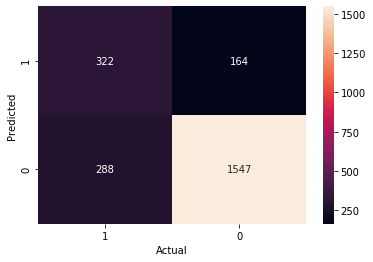

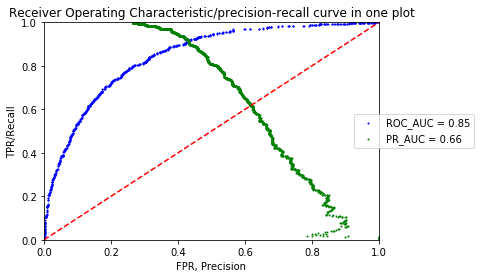

In [160]:
# evaluation metrics and visualization
y_pred_model = grid_search_gbm.best_estimator_.predict(X_test_1)
y_prob_model = grid_search_gbm.best_estimator_.predict_proba(X_test_1)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v2 + GridSearchCV

In [161]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8,12, 16],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
    'tol': [1e-8, 1e-6,]
    
        
}
# Create a based model
gbm = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbm2 = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_gbm2.fit(X_train_2, y_train_1)
print(grid_search_gbm2.best_score_)
print(grid_search_gbm2.best_estimator_.get_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   13.9s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5990436007711887
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=12,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1e-06,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


In [162]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm2.predict(X_test_2))))

f1-score on training set: 0.6573548668703623
f1-score on test set: 0.5869565217391305


In [163]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_gbm2
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.5868725868725869
test score in fold 1: 0.5860709592641261
test score in fold 2: 0.624187256176853
average: 0.5990436007711887


classification_report
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1711
           1       0.32      0.01      0.03       610

    accuracy                           0.73      2321
   macro avg       0.53      0.50      0.44      2321
weighted avg       0.63      0.73      0.63      2321



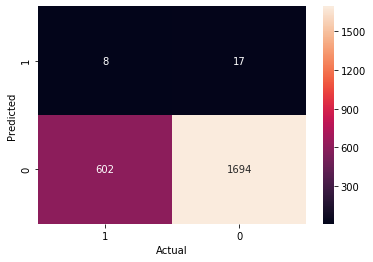

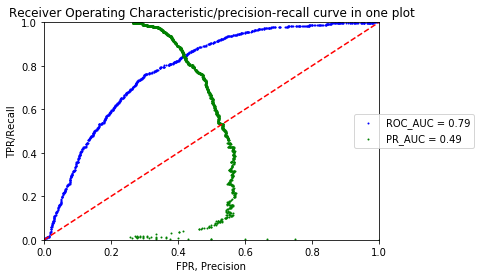

In [164]:
# evaluation metrics and visualization
y_pred_model = grid_search_gbm.best_estimator_.predict(X_test_2)
y_prob_model = grid_search_gbm.best_estimator_.predict_proba(X_test_2)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v3 + GridSearchCV

In [165]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8,12, 16],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
    'tol': [1e-8, 1e-6,]
    
        
}
# Create a based model
gbm = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbm3 = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_gbm3.fit(X_train_3, y_train_3)
print(grid_search_gbm3.best_score_)
print(grid_search_gbm3.best_estimator_.get_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   10.2s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5899720671568464
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=12,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1e-06,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


In [166]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_gbm3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_gbm3.predict(X_test_3))))

f1-score on training set: 0.6491228070175439
f1-score on test set: 0.5753676470588235


In [167]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_gbm3
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.596401028277635
test score in fold 1: 0.5660881174899866
test score in fold 2: 0.6074270557029178
average: 0.5899720671568464


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.51      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



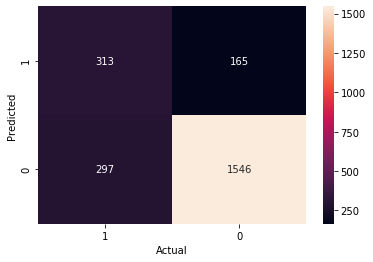

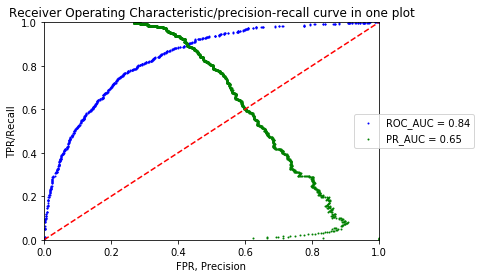

In [168]:
# evaluation metrics and visualization
y_pred_model = grid_search_gbm3.best_estimator_.predict(X_test_3)
y_prob_model = grid_search_gbm3.best_estimator_.predict_proba(X_test_3)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_3, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

#### data v4 + GridSearchCV

In [169]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8,12, 16],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
    'tol': [1e-8, 1e-6,]
    
        
}
# Create a based model
gbm = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbm4 = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1, )


# Fit the random search model
_ = grid_search_gbm4.fit(X_train_4, y_train_4)
print(grid_search_gbm4.best_score_)
print(grid_search_gbm4.best_estimator_.get_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   50.8s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5833821545578419
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=16,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1e-06,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


In [170]:
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_gbm4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_gbm4.predict(X_test_4))))

f1-score on training set: 0.6590709903593339
f1-score on test set: 0.5751152073732719


In [171]:
# the scores of best estimator at each cross-validatioin n-fold
grid_model_tmp = grid_search_gbm4
n_fold = 3
avg = []
for fold in range(n_fold):
    print("test score in fold {}: {}".format(fold, 
                                          grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_]))
    avg.append(grid_model_tmp.cv_results_['split'+str(fold)+'_test_score'][grid_model_tmp.best_index_])
print("average: {}".format(np.mean(avg)))

test score in fold 0: 0.577896138482024
test score in fold 1: 0.5668449197860963
test score in fold 2: 0.6054054054054053
average: 0.5833821545578419


classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.66      0.51      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



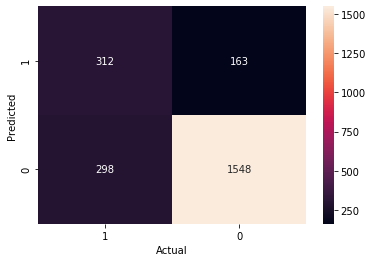

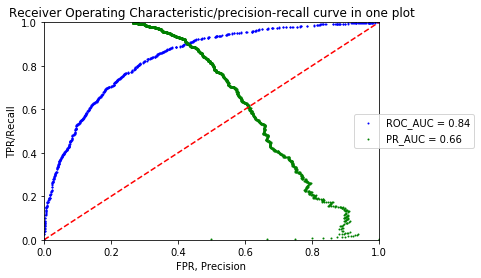

In [172]:
# evaluation metrics and visualization
y_pred_model = grid_search_gbm4.best_estimator_.predict(X_test_4)
y_prob_model = grid_search_gbm4.best_estimator_.predict_proba(X_test_4)[:,1]
# y_prob_model = y_pred_model
# y_prob_model

model_evaluation(y_test=y_test_4, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [173]:
#### try different n-fold number

In [174]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV

param_grid = {
     'learning_rate':[  0.05, 0.1],
    'n_estimators':[50, 100, 150],
    'max_depth' : [3],
    'min_samples_leaf': [ 8 ],
    'min_samples_split':[ 8,12, 16],
    'max_features':[0.8, 0.9],
#     'max_depth': [ 3,  8, 12, ],
#     'min_samples_leaf': [ 4, 8, 16, ],
#     'min_samples_split':[ 2, 4, 8,],
#     'max_features':['auto', 0.9],
    'tol': [1e-8, 1e-6,]
    
        
}
# Create a based model
gbm = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbm5 = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 5, 
                          scoring='f1',
                          n_jobs = -1, verbose = 1)


# Fit the random search model
_ = grid_search_gbm5.fit(X_train_1, y_train_1)
print(grid_search_gbm5.best_score_)
print(grid_search_gbm5.best_estimator_.get_params)

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm5.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm5.predict(X_test_1))))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.9s finished
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6038098400935118
<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=12,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1e-06,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>
f1-score on training set: 0.6440382941688425
f1-score on test set: 0.5867393278837421


#### notes:
It turns out the number of n-fold might also determine hyper-parameter selection and thus determine the model performance.

In [175]:
# summary of linear regression
print('Data1 quantile')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=gbm1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=gbm1.predict(X_test_1))))
print('----------')
print('Data1 + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm.predict(X_test_1))))
print('----------')
print('Data2 non-transformation + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=grid_search_gbm2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=grid_search_gbm2.predict(X_test_2))))
print('----------')
print('Data3 SelectKBest + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_3, y_pred=grid_search_gbm3.predict(X_train_3))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_3, y_pred=grid_search_gbm3.predict(X_test_3))))
print('----------')
print('Data4 PCA + GridSearch')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_4, y_pred=grid_search_gbm4.predict(X_train_4))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_4, y_pred=grid_search_gbm4.predict(X_test_4))))
print('----------')
print('Data1 + GridSearch 5 n-folds')
print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=grid_search_gbm5.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=grid_search_gbm5.predict(X_test_1))))


Data1 quantile
f1-score on training set: 0.6463679860809047
f1-score on test set: 0.5837837837837837
----------
Data1 + GridSearch
f1-score on training set: 0.636085626911315
f1-score on test set: 0.5875912408759123
----------
Data2 non-transformation + GridSearch
f1-score on training set: 0.6573548668703623
f1-score on test set: 0.5869565217391305
----------
Data3 SelectKBest + GridSearch
f1-score on training set: 0.6491228070175439
f1-score on test set: 0.5753676470588235
----------
Data4 PCA + GridSearch
f1-score on training set: 0.6590709903593339
f1-score on test set: 0.5751152073732719
----------
Data1 + GridSearch 5 n-folds
f1-score on training set: 0.6440382941688425
f1-score on test set: 0.5867393278837421


# Summary

#### First let's orgainzed all the estimators and calculate all the associated metrics. Note you might want to install [plotly](https://plot.ly/python/getting-started/) if you want to play with the dashboard.

In [194]:
# organize the performance result
# estimator instance
model_list = np.array([[lr1, lr2, lr3, lr4],
              [grid_search_svm, grid_search_svm2, grid_search_svm3, grid_search_svm4],
              [grid_search_knn, grid_search_knn2, grid_search_knn3, grid_search_knn4],
              [grid_search_nb, grid_search_nb2, grid_search_nb3, grid_search_nb4],
              [grid_search_dtc, grid_search_dtc2, grid_search_dtc3, grid_search_dtc4],
              [grid_search_rfc, grid_search_rfc2, grid_search_rfc3, grid_search_rfc4],
              [grid_search_gbm, grid_search_gbm2, grid_search_gbm3, grid_search_gbm4],
             ])

# model name
model_name = model_list.ravel()

# model type
model_type =np.array([["logistic regression", "SVM", "KNN", "Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting Model"]] *4)
model_type = np.swapaxes(model_type, axis1=0, axis2=1).ravel()

# data version
model_data = ["v1-quantile", "v2-none", "v3-Kbest", "v4-PCA"]*7

# model data
model_data_X_train = np.array([X_train_1, X_train_2, X_train_3, X_train_4]*7).ravel()
# model_data_y_train = np.array([y_train_1 ]*28).ravel()
model_data_X_test = np.array([X_test_1, X_test_2, X_test_3, X_test_4]*7).ravel()
# model_data_y_test = np.array([y_test_1, y_test_2, y_test_3, y_test_4]*7).ravel()

In [178]:
# collect prediction and probability
model_train_pred=[]
model_train_prob=[]
model_test_pred=[]
model_test_prob=[]
for index,model in enumerate(model_name):
    model_train_pred.append(model.predict(model_data_X_train[index]))
    model_train_prob.append(model.predict_proba(model_data_X_train[index])[:,1])
    model_test_pred.append(model.predict(model_data_X_test[index]))
    model_test_prob.append(model.predict_proba(model_data_X_test[index])[:,1])      

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# collect accuracy, precision, recall, f1-score, roc-auc, pr-auc(AP)
model_train_accuracy=[]
model_test_accuracy=[]
model_train_precision=[]
model_test_precision=[]
model_train_recall=[]
model_test_recall=[]

model_train_f1=[]
model_test_f1=[]
model_train_rocauc=[]
model_test_rocauc=[]
model_train_prauc=[]
model_test_prauc=[]
for index,model in enumerate(model_name):
    model_train_accuracy.append(accuracy_score(y_true=y_train_1, y_pred=model_train_pred[index]))
    model_test_accuracy.append(accuracy_score(y_true=y_test_1, y_pred=model_test_pred[index]))    
    model_train_precision.append(precision_score(y_true=y_train_1, y_pred=model_train_pred[index]))
    model_test_precision.append(precision_score(y_true=y_test_1, y_pred=model_test_pred[index]))    
    model_train_recall.append(recall_score(y_true=y_train_1, y_pred=model_train_pred[index]))
    model_test_recall.append(recall_score(y_true=y_test_1, y_pred=model_test_pred[index]))      
    
    model_train_f1.append(f1_score(y_true=y_train_1, y_pred=model_train_pred[index]))
    model_test_f1.append(f1_score(y_true=y_test_1, y_pred=model_test_pred[index]))    
    model_train_rocauc.append(roc_auc_score(y_true=y_train_1, y_score=model_train_prob[index]))
    model_test_rocauc.append(roc_auc_score(y_true=y_test_1, y_score=model_test_prob[index]))    
    model_train_prauc.append(average_precision_score(y_true=y_train_1, y_score=model_train_prob[index]))
    model_test_prauc.append(average_precision_score(y_true=y_test_1, y_score=model_test_prob[index]))      
    

In [201]:
columns = np.array([model_name, model_type, model_data,
                           model_train_accuracy, model_test_accuracy, 
                            model_train_precision, model_test_precision, 
                            model_train_recall, model_test_recall,
                            model_train_f1, model_test_f1,
                            model_train_rocauc, model_test_rocauc,
                            model_train_prauc, model_test_prauc])

df_performance = pd.DataFrame(np.swapaxes(columns, axis1=0, axis2=1))
df_performance.columns=["name", "type", "data", "train_accuracy", "test_accuracy", "train_precision", "test_precision",
                        "train_recall","test_recall", "train_f1", "test_f1", "train_rocauc", "test_rocauc", "train_pcauc", "test_pcauc"]
df_performance

,name,type,data,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_rocauc,test_rocauc,train_pcauc,test_pcauc
0,"LogisticRegression(C=1.0, class_weight=None, d...",logistic regression,v1-quantile,0.81193,0.805687,0.679155,0.662577,0.561557,0.531148,0.614783,0.589627,0.855536,0.844594,0.678663,0.670114
1,"LogisticRegression(C=1.0, class_weight=None, d...",logistic regression,v2-none,0.805137,0.799224,0.658605,0.640078,0.562351,0.539344,0.606684,0.585409,0.849613,0.842247,0.663968,0.653112
2,"LogisticRegression(C=1.0, class_weight=None, d...",logistic regression,v3-Kbest,0.803651,0.796209,0.667335,0.642412,0.528991,0.506557,0.590164,0.566453,0.848458,0.839113,0.656459,0.652596
3,"LogisticRegression(C=1.0, class_weight=None, d...",logistic regression,v4-PCA,0.81193,0.805687,0.679155,0.662577,0.561557,0.531148,0.614783,0.589627,0.855537,0.844597,0.678663,0.670116
4,"GridSearchCV(cv=5, error_score=nan,\n ...",SVM,v1-quantile,0.812354,0.804395,0.683643,0.66318,0.554408,0.519672,0.612281,0.582721,0.850331,0.840285,0.670936,0.664043
5,"GridSearchCV(cv=5, error_score=nan,\n ...",SVM,v2-none,0.785184,0.781991,0.686838,0.656627,0.360604,0.357377,0.472917,0.462845,0.803669,0.791387,0.610551,0.584323
6,"GridSearchCV(cv=3, error_score=nan,\n ...",SVM,v3-Kbest,0.820208,0.799224,0.724891,0.669811,0.527403,0.465574,0.610575,0.549323,0.858972,0.809113,0.705547,0.636551
7,"GridSearchCV(cv=3, error_score=nan,\n ...",SVM,v4-PCA,0.811717,0.804395,0.682711,0.663866,0.552025,0.518033,0.610452,0.581952,0.850264,0.84053,0.670912,0.664316
8,"GridSearchCV(cv=3, error_score=nan,\n ...",KNN,v1-quantile,0.803226,0.795347,0.654851,0.629559,0.557585,0.537705,0.602317,0.580018,0.848119,0.837406,0.655588,0.645966
9,"GridSearchCV(cv=3, error_score=nan,\n ...",KNN,v2-none,0.998726,0.768203,0.999203,0.570039,0.996029,0.480328,0.997613,0.521352,0.999995,0.741467,0.999981,0.517813


In [209]:
import plotly.offline as py #visualization as py
import plotly.graph_objects as go


def output_tracer(model_performances, metric,color) :
    tracer = go.Bar(y = model_performances["type"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances on data V1",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2,
                                    autorange = 'reversed'),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

model_disp = df_performance[df_performance.data=='v1-quantile']
trace1a  = output_tracer(model_disp, "train_accuracy","#5599FF")
trace1  = output_tracer(model_disp, "test_accuracy","#7799FF")

trace2a  = output_tracer(model_disp, 'train_precision',"#d62728")
trace2  = output_tracer(model_disp, 'test_precision',"red")

trace3a  = output_tracer(model_disp, 'train_recall',"#11CC99")
trace3  = output_tracer(model_disp, 'test_recall',"#99CC99")

trace4a  = output_tracer(model_disp, 'train_f1',"grey")
trace4  = output_tracer(model_disp, 'test_f1',"lightgrey")

# trace5  = output_tracer('test_rocauc',"#FFCC99")

# trace6  = output_tracer('test_pcauc',"#FFCC99")

# data = [trace1,trace2,trace3,trace4,trace5]
data = [trace1a,trace1, trace2a, trace2,trace3a, trace3,trace4a, trace4,]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


#### Notes: 
- With the metrics we care about ploted in dashboard, we can easily compare the performance accross several models. (Hop on the bar and it will show the values.)
- The result is from data Version 1 with quantile transformation.
- Note that Naive Bayes model favor recall over precision. So, if recall is our priority, we might take a closer look into the result from Naive Bayes model.

In [208]:
layout = go.Layout(dict(title = "Model performances on data V2: Non-trasformation data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2,
                                    autorange = 'reversed'),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

model_disp = df_performance[df_performance.data=='v2-none']
trace1a  = output_tracer(model_disp, "train_accuracy","#5599FF")
trace1  = output_tracer(model_disp, "test_accuracy","#7799FF")

trace2a  = output_tracer(model_disp, 'train_precision',"#d62728")
trace2  = output_tracer(model_disp, 'test_precision',"red")

trace3a  = output_tracer(model_disp, 'train_recall',"#11CC99")
trace3  = output_tracer(model_disp, 'test_recall',"#99CC99")

trace4a  = output_tracer(model_disp, 'train_f1',"grey")
trace4  = output_tracer(model_disp, 'test_f1',"lightgrey")
# trace5  = output_tracer('test_rocauc',"#FFCC99")
# trace6  = output_tracer('test_pcauc',"#FFCC99")

# data = [trace1,trace2,trace3,trace4,trace5]
data = [trace1a,trace1, trace2a, trace2,trace3a, trace3,trace4a, trace4,]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Note:
- This model is trained and evaluated on data Version 2, which has not been transformed.
- Notice the overfitting of KNN model, which is due to the fact that the features of data Version 2 are not in the same scale.
- Later we might compare different data version side-by-side, so that we can see the performance among different data version more easily.

In [210]:
layout = go.Layout(dict(title = "Model performances on data V3: SelectKBest",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2,
                                    autorange = 'reversed'),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

model_disp = df_performance[df_performance.data=='v3-Kbest']
trace1a  = output_tracer(model_disp, "train_accuracy","#5599FF")
trace1  = output_tracer(model_disp, "test_accuracy","#7799FF")

trace2a  = output_tracer(model_disp, 'train_precision',"#d62728")
trace2  = output_tracer(model_disp, 'test_precision',"red")

trace3a  = output_tracer(model_disp, 'train_recall',"#11CC99")
trace3  = output_tracer(model_disp, 'test_recall',"#99CC99")

trace4a  = output_tracer(model_disp, 'train_f1',"grey")
trace4  = output_tracer(model_disp, 'test_f1',"lightgrey")
# trace5  = output_tracer('test_rocauc',"#FFCC99")
# trace6  = output_tracer('test_pcauc',"#FFCC99")

# data = [trace1,trace2,trace3,trace4,trace5]
data = [trace1a,trace1, trace2a, trace2,trace3a, trace3,trace4a, trace4,]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Note:
- This is the result from data Versioin 3. Comparing to data Versioin 1, we eliminated collinear features based on their selectKbest value (exclude the one with lower selectKBest score)
- KNN overfitted the data again, but I am not exactely sure why this happend, while it didn't happen in data Version 1.

In [218]:
layout = go.Layout(dict(title = "Model performances on data V4: PCA",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2,
                                    autorange = 'reversed'),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

model_disp = df_performance[df_performance.data=='v4-PCA']
trace1a  = output_tracer(model_disp, "train_accuracy","#5599FF")
trace1  = output_tracer(model_disp, "test_accuracy","#7799FF")

trace2a  = output_tracer(model_disp, 'train_precision',"#d62728")
trace2  = output_tracer(model_disp, 'test_precision',"red")

trace3a  = output_tracer(model_disp, 'train_recall',"#11CC99")
trace3  = output_tracer(model_disp, 'test_recall',"#99CC99")

trace4a  = output_tracer(model_disp, 'train_f1',"grey")
trace4  = output_tracer(model_disp, 'test_f1',"lightgrey")
# trace5  = output_tracer('test_rocauc',"#FFCC99")
# trace6  = output_tracer('test_pcauc',"#FFCC99")

# data = [trace1,trace2,trace3,trace4,trace5]
data = [trace1a,trace1, trace2a, trace2,trace3a, trace3,trace4a, trace4,]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Note:
- Data Version 4 is generated from Data Version 1 using PCA.
- Note that Decsision Tree and Random Forest models tend to overfit using data Version 4. Normally overfitting can be prevented in Random Forest if we better tune the hyperparameters.

In [233]:
def output_tracer2(model_performances, data_v,color) :
    tracer = go.Bar(y = model_performances["type"] ,
#                     offsetgroup = model_performances['data'],
                    x = model_performances["test_f1"],
                    orientation = "h",name = data_v ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "F1-score on test set",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2,
                                    autorange = 'reversed'),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

model_disp = df_performance[df_performance.data=='v1-quantile']
trace1  = output_tracer2(model_disp, "v1-quantile","#5599FF")

model_disp = df_performance[df_performance.data=='v2-none']
trace2  = output_tracer2(model_disp, 'v2-none',"red")

model_disp = df_performance[df_performance.data=='v3-Kbest']
trace3  = output_tracer2(model_disp, 'v3-Kbest',"#99CC99")

model_disp = df_performance[df_performance.data=='v4-PCA']
trace4  = output_tracer2(model_disp, 'v4-PCA',"lightgrey")


data = [trace1, trace2, trace3, trace4]
# data = [trace1a,trace1, trace2a, trace2,trace3a, trace3,trace4a, trace4,]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Notes:
- Generally speaking, data version 1-quantile and data version 4-PCA have the best performance when using F1-score as the key metric. 
- Especially for SVM and KNN, the performance of data version 2 and data version 3 are bad.
- Ensemble models like Random Forest and Grandient Boosting model perform evenly for different data suits. Also ensemble methods are more robust when combining with GridSearchCV.

### Suggest of preprocessing and choosing models 
- Quantile transformed data is suitable for most of the estimators judged by the performance. So, we should include quantile transformation in the preprocessing pipeline, i.e. with the help of sklearn's sklearn.preprocessing.quantile_transform, which can satisfy most of the requirement.
- Logistic regression model has a robust performance for different data type and different metrics. It is time-efficient and doesn't require too much of tuning. So, we can use logistic regression as the base-line estimator to fast set up the performance base-line.
- Ensemble models like Random Forest and Gradient Boosting Models are flexible and potentially perform well if the models are properly tuned. But sometimes hyper-parameter tuning can be time-consuming and tedious. Besides, GridSearchCV, sklearn.model_selection.RandomizedSearchCV is anoher handy tool for parameter optimization.
- Certain model might has its own advantage(s) for certain problems. We have observed Naive Bayes model tend to have higher recall score (in the cost of lower precision-score). This can be useful if recall rate is the priority.
- Cross-validation is very useful to prevent overfitting. Note the number of n-fold has impact of the training-validation outcomes and thus affects the hyper-parameter tuning as well.

## Future work
- In this project, we have gone through exploratory data exploration, data engineering, data training and evaluation of the machine learning results. But our journey doesn't end here. In order to make the model into products there are much to do.
- So far, we've got the prediction in "yes" or "no", and also we have the predicted probabily. We might have a better understanding of the prediected result. For instance, we can gain confidence level and tune the model using probability calibration. 
- Another work is to explore threshold adjusting. The following figure shows the ROC curve and precision-recall curve with respective to different threshold. By adjusting the threshold, we can ahieve more desired result.

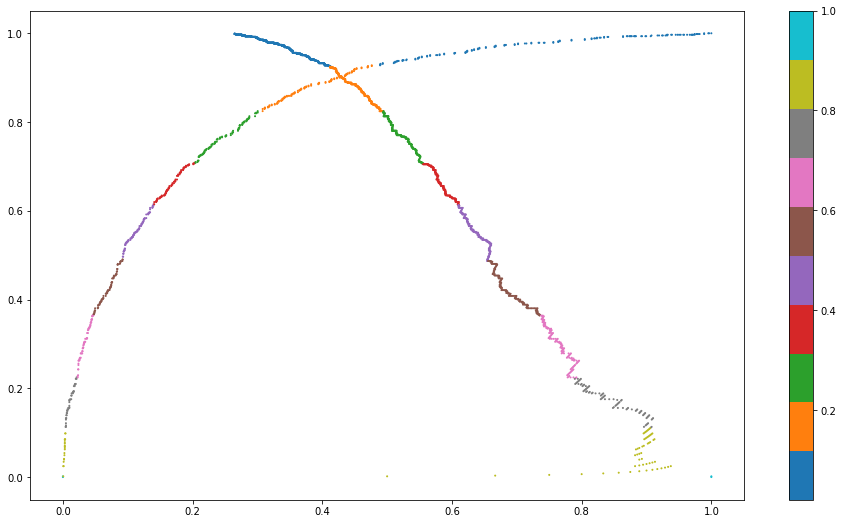

In [237]:
y_test_tmp=y_pred_model
y_pred_prob=y_prob_model

plt.figure(figsize=(16,9))
    # ROC plot

fpr, tpr, threshold = roc_curve(y_test_1, y_prob_model)
threshold[0]=1
roc_auc = auc(fpr, tpr)
plt.scatter(fpr, tpr, c=threshold, cmap='tab10', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)

# plt.scatter(x, y, c=t, cmap='viridis')
plt.colorbar()


precision, recall, thresholds2 = precision_recall_curve(y_test_1, y_prob_model)
thresholds2 = np.append(thresholds2,1)
pr_auc = auc(recall,precision)

#     average_precision = average_precision_score(y_test_tmp, y_pred_prob)

# plt.scatter(precision, recall, 'g', label = 'AP = %0.2f' % average_precision)
plt.scatter(precision, recall, c=thresholds2, cmap='tab10', s=1, label = 'PR_AUC = %0.2f' % pr_auc)

